# **Bank Churners Prediction**

**Dataset:** https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data <br>
**Zadatak:** *Binarna klasifikacija tabelarnih podataka, koji sadrže katergoričke i numeričke atribute, kako bi se detektovali potencijalni korisnici koji su skloni napuštanju banke.* <br>
**Metode klasifikacije:** *Reč je o nebalansiranom datasetu, pa će se za klasifikaciju ovakvih podataka koristiti različite ensamble metode kako bismo dobili bolje rezultate.* AdaBoost, BaggingClassifier i VotingClassifier,

## Importovanje korišćenih biblioteka

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
from sklearn.decomposition import PCA
import sklearn.compose as compose
import sklearn.pipeline as pipeline
import sklearn.preprocessing as preproc
import sklearn.feature_selection as feat_selection

In [6]:
import warnings

pd.set_option('display.max_columns', 25)
warnings.filterwarnings("ignore", category=UserWarning)

## Učitavanje podataka

In [7]:
dataset_url = './dataset/BankChurners.csv'

df = pd.read_csv(dataset_url, sep=",")

In [8]:
df.shape

(10127, 23)

In [9]:
df.tail(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
10122                0.857                  0.462   
10123                0.683                  0.511   
10124                0.818                  0.000   
10125                0.722                  0.000   
10126                0.649                  0.189   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
10122                                           0.000191                                                                                    
10123                                           0.995270                                                                                    
10124                                           0.997880                                                                                    
10125                                           0.996710                                                                                    
10126                                           0.996620                                                                                    

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
10122                                           0.999810                                                                                   
10123                                           0.004729                                                                                   
10124                                           0.002118                                                                                   
10125                                           0.003294

In [10]:
df.drop(["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

Poslednje dve kolone dataseta brišemo, jer nisu od interesa za klasifikaciju (što je i navedeno u opisu dataseta: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data). Odmah brišemo i kolonu CLIENTNUM, koja predstavlja ID klijenta i takođe ne nosi nikakve značajne informacije za klasifikaciju.

In [11]:
df.shape

(10127, 20)

## EDA - Istraživačka analiza podataka

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Vidimo da naš dataset sadrži: <br>
- kategoričke atribute: (*Gender*, *Education_Level*, *Marital Status*, *Income_Category*, *Card_Category*) <br>
- numeričke atribute: (*Customer_Age*, *Dependent_Count*, *Months_on_book*, *Total_Relationship_Count*, *Months_Inactive_12_mon*, *Contacts_Count_12_mon*, *Credit_Limit*, *Total_Revolving_Bal*, *Avg_Open_To_Buy*, *Total_Amt_Chng_Q4_Q1*,            *Total_Trans_Amt*, *Total_Trans_Ct*, *Total_Ct_Chng_Q4_Q1*, *Avg_Utilization_Ratio*).

Neki od kategoričkih atributa su **nominalni** (*Gender*, *Marital_Status*), dok su ostali **ordinalni**. <br>
Neki numerički atributi su **kontinualni** (svi atributi tipa *float64*), dok su atributi tipa *int64* **diskretni**. <br>
**Klasni atribut** je *Attrition_Flag*.

U nastavku vizuelizujemo raspodele numeričkih atributa i trakaste grafikone kategoričkih atributa korišćenjem biblioteke **Seaborn**.

In [13]:
attrs = {
    "categorical": {
        "nominal": ["Gender", "Marital_Status"],
        "ordinal": ["Education_Level", "Income_Category", "Card_Category"],
    },
    "numerical": [attr for attr in df.select_dtypes(include=["float64", "int64"]).columns],
    "target": "Attrition_Flag"
}

attrs

{'categorical': {'nominal': ['Gender', 'Marital_Status'],
  'ordinal': ['Education_Level', 'Income_Category', 'Card_Category']},
 'numerical': ['Customer_Age',
  'Dependent_count',
  'Months_on_book',
  'Total_Relationship_Count',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Avg_Open_To_Buy',
  'Total_Amt_Chng_Q4_Q1',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Total_Ct_Chng_Q4_Q1',
  'Avg_Utilization_Ratio'],
 'target': 'Attrition_Flag'}

In [14]:
sns.set_theme()

<Axes: ylabel='count'>

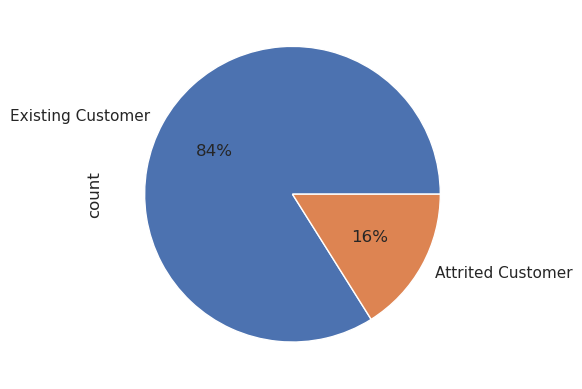

In [15]:
df["Attrition_Flag"].value_counts().plot(kind="pie", autopct='%.0f%%')

Možemo da vidimo da je naš dataset loše balansiran - značajno imamo manje korisnika koji su napustili banku (samo 16%), što može da oteža definisanje dobrog modela klasifikacije.

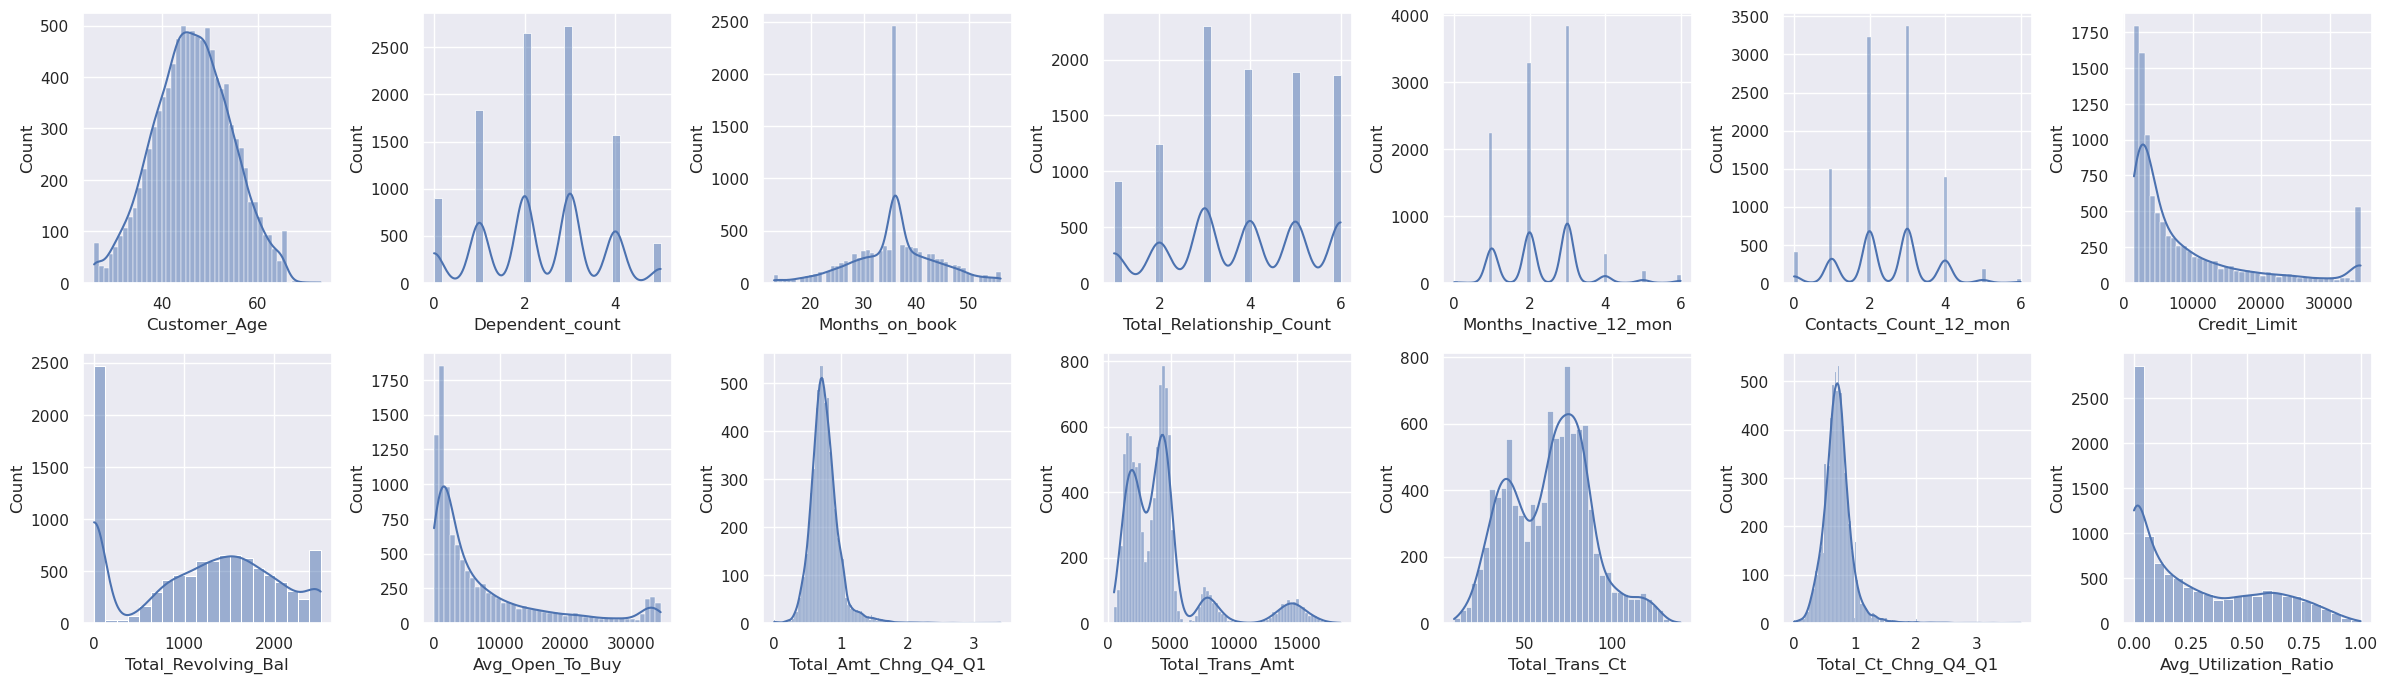

In [16]:
fig, ax = plt.subplots(2, 7, figsize=(24, 7))
ax = ax.flatten()

for i, col_name in enumerate(attrs["numerical"]):
    sns.histplot(data=df, x=col_name, kde=True, ax=ax[i])

fig.tight_layout()

In [17]:
df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

Na osnovu histograma raspodele numeričkih atributa možemo da primetimo sledeće interesantne stvari:
- Atributi *Credit_Limit* i *Total_Revolving_Balance* imaju neobično veliki skok učestalosti za desnom kraju - ovo može da sugeriše da je za ove atribute postavljena fiksna gornja vrednost, koja ne oslikava pravo stanje stvari. U realnim primerima bi raspodela pomenutih atributa izgledala slično kao npr. kod atributa *Avg_Utilization_Ratio*.
- Atribut *Months_on_book* koji predstavlja broj meseci od kako je korisnik postalo korisnik banke ima izražen **modus** za vrednost 36 - ovo može biti potencijalna greška koju je potrebno proveriti. Kada bi ova vrednost bila manje izražena, raspodela ovog atibuta bi bila približna normalnoj raspodeli što se i prirodno očekuje.

Proverićemo ova tvrđenja u nastavku.

In [18]:
max_credit_limit = df["Credit_Limit"].max()
n__limit_max = df[df["Credit_Limit"] == max_credit_limit].shape[0]
print(f'Najveci limit kreditne kartice je: {max_credit_limit}')
print(f'Cak {n__limit_max} vrsta ima ovu vrednost za maksimalni limit')

Najveci limit kreditne kartice je: 34516.0
Cak 508 vrsta ima ovu vrednost za maksimalni limit


In [19]:
max_revolving_bal = df["Total_Revolving_Bal"].max()
n_rev_max = df[df["Total_Revolving_Bal"] == max_revolving_bal].shape[0]
print(f'Najveci vrednost za revolving_balnce je: {max_revolving_bal}')
print(f'Cak {n_rev_max} vrsta ima ovu vrednost za revolving_balance')

Najveci vrednost za revolving_balnce je: 2517
Cak 508 vrsta ima ovu vrednost za revolving_balance


Vidimo da čak postoji isti broj vrsta (508) sa vrednostima *Total_Revolving_Balance* i *Credit_Limit* postavljene na maksimalnu. Ovo ne može biti slučajno. Postoje dve opcije - ili ove vrednosti nedostaju "u parovima" pa su nasumično popunjene maksimalnim vrednostima (što je manje verovanto) ili postoje korisnici koji nemaju limit na kreditnim karticama, koji je iz tog razloga postavljen na max. Takođe, je logično očekivati da ovi korisnici mogu imati veće zaostale dugove, zbog čega je njihov revolving_balance postavljen na maksimalnu vrednost. Ova druga mogućnost je verovatnija ali ćemo je svakako naknadno istražiti kasnije.

In [20]:
mnth_on_book_mode = df["Months_on_book"].mode()[0]
n_mode = df[df["Months_on_book"] == mnth_on_book_mode].shape[0]
print(f'Modus za atribut Months_on_book je: {mnth_on_book_mode} i ovu vrednost ima {n_mode} vrsta.')

Modus za atribut Months_on_book je: 36 i ovu vrednost ima 2463 vrsta.


Čak oko 24% vrsta (2463 od 10127) ima najučestaliju vrednost za atribut *Months_on_book*. Iako je ovde potencijalno u pitanju neka greška, postoji i druga mogućnost (npr. moguće je da se inicialni ugovor potpisuje na 3 godine, nakon čega dosta korisnika odluči da prekine saradnju sa bankom). Kako nije moguće naći dodatne informacije o ovom konkretnom skupu podataka, za sada ćemo se držati ove druge pretpostavke.

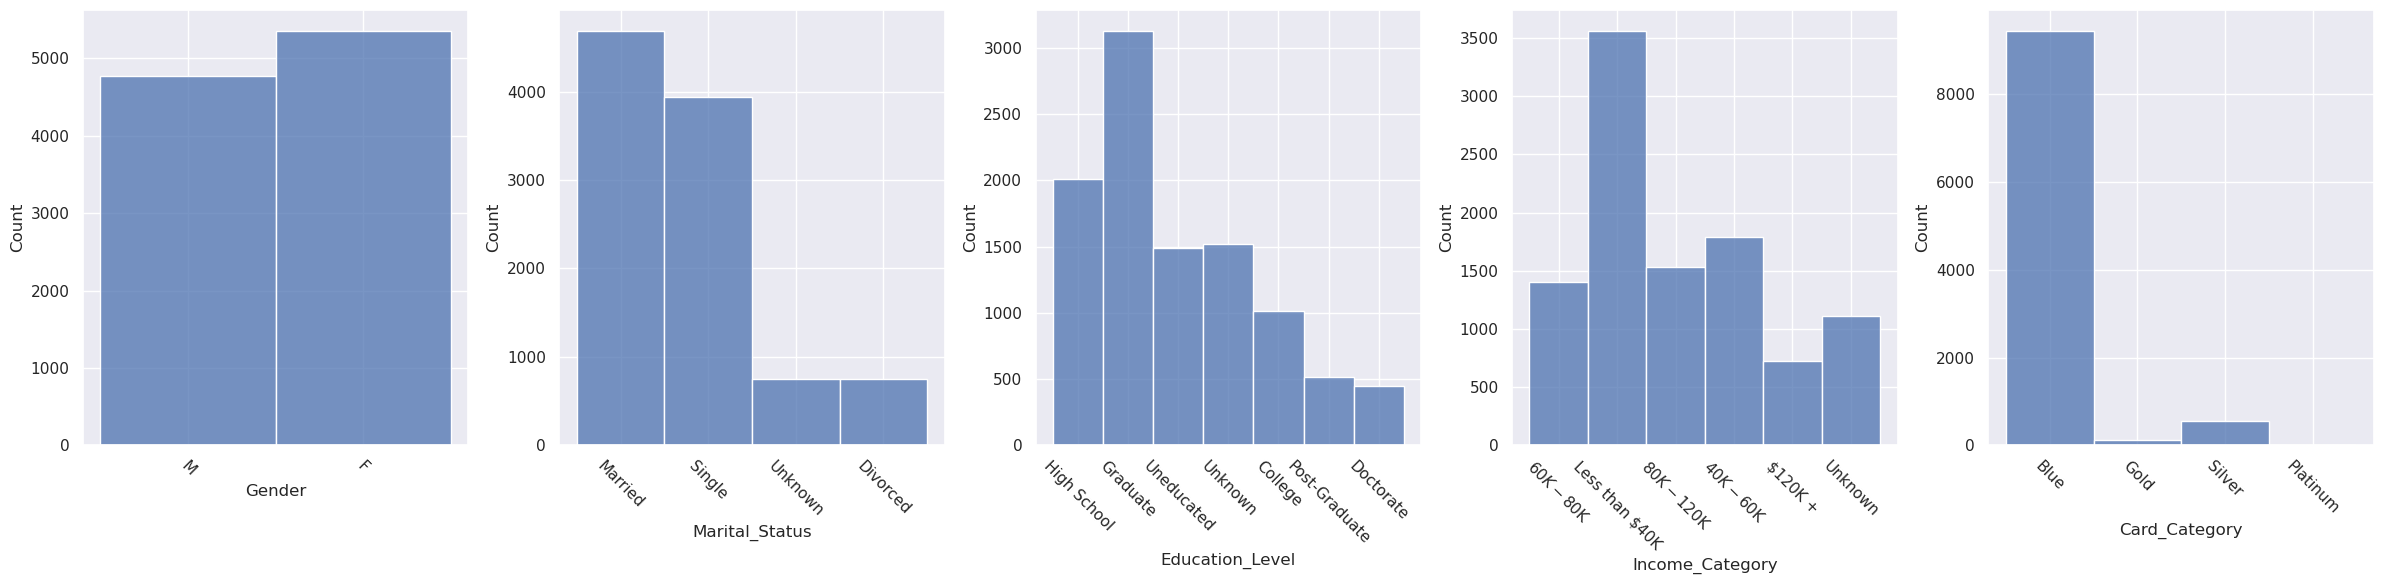

In [21]:
from itertools import chain

fig, ax = plt.subplots(1, 5, figsize=(24, 6))
categorical = list(chain.from_iterable(attrs["categorical"].values()))

for i, col_name in enumerate(categorical):
    p = sns.histplot(data=df, x=col_name, kde=False, ax=ax[i])
    p.set_xticklabels(labels=p.get_xticklabels(), rotation=-45)

fig.tight_layout()


Nedostajuće vrednosti:
- Bitno je da primetimo da kod kategoričkih atributa *Marital_Status*, *Education_Level* i *Income_Category* imamo određeni broj vrsta sa nedostajućim vrednostima - koje su u ovom datasetu označene sa **Unknown**. U nastavku ćemo prvenstveno rešiti ovaj problem, a zatim se vratiti na dalju analizu gore pomenutih atributa *Credit_Limit* i *Total_Revolving_Bal*.

Pre analize nedostajućih vrednosti odvajamo deo dataseta (20%) za testiranje i ostavljamo ga po strani. Kako bi skup za testiranje verodostojno oslikavao realni odnos klasa koji je pristupan u originalnom skupu podataka, koristimo stratifikovanu podelu.

### Train-test podela

In [22]:
train, test = model_selection.train_test_split(df, test_size=0.2, stratify=df["Attrition_Flag"], random_state=42)

In [23]:
train.shape

(8101, 20)

In [24]:
test.shape

(2026, 20)

In [25]:
train["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    6799
Attrited Customer    1302
Name: count, dtype: int64

In [26]:
test["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    1701
Attrited Customer     325
Name: count, dtype: int64

In [27]:
train_cp = train.copy(deep=True)

U nastavku će se analiza vršiti i vrednosti ćemo popunjavati u trening skupu, kako bi konačna procena modela na test skupu bila što nepristrasnija (ostavljanjem test skupa po strani sprečava se slučajno "curenje" tj. uticaj ovih podataka na parametre u komeponenti za pretprocesiranje, kao i na sam model).

### Upravljanje nedostajućim vrednostima

Pre nego što izaberemo način kojim ćemo rešiti problem nedostajućih vrednosti, potrebno je odrediti koji je tip nedostajućih podataka. Generalno postoje 3 tipa:
- **MCAR - Missing completely at random**:  nedostajuće vrednosti se mogu pojaviti u bilo kojoj vrsti sa jednakom verovatnoćom
- **MAR - Missing at random**:  pojava nedostajuće vrednosti može zavisiti od ostalih atributa u datasetu, ali ne i od samog atributa čija vrednost nedostaje
- **MNAR - Missing NOT at random**: postoji razlog za pojavu nedostajuće vrednosti (npr. u slučaju nekih privatnih pitanja, kao što je status veze, korinici često izbegavaju da daju odgovor).

Intuitivno je logično da su u slučaju atributa koje imamo ove nedostajuće vrednosti upravo **MNAR** tipa (na pitanje bračnog statusa korisnici u nerećnim vezama, ili razvedeni korisnici su verovatniji da izbegnu da daju odgovor, slično važi i za pitanje obrazovanja i prihoda), pa ćemo ovo i proveriti.

Text(0.5, 1.0, 'Slika 1 - Raspodela target klase u zavisnoti od Merital_Status vrednosti')

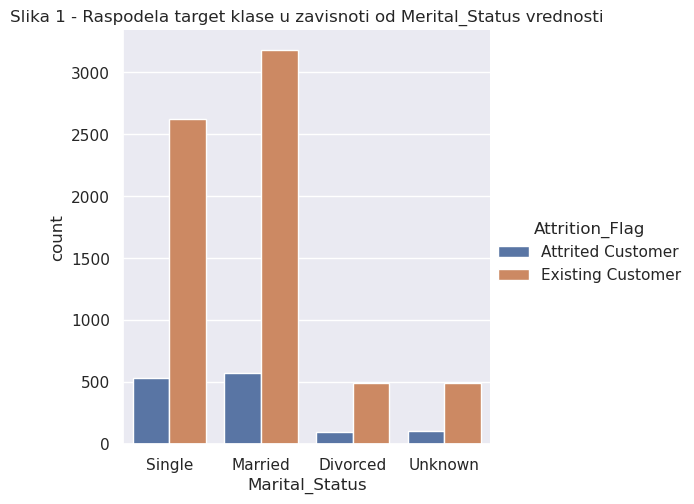

In [28]:
sns.catplot(data=train_cp, x="Marital_Status", hue="Attrition_Flag", kind="count")
plt.title("Slika 1 - Raspodela target klase u zavisnoti od Merital_Status vrednosti")

In [29]:
pca = PCA(n_components=2, svd_solver="auto", random_state=42)

education_categories = ["Unknown", "Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate"]
income_categories = ["Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
card_categories=["Blue", "Silver", "Gold", "Platinum"]

nominal_pipeline = pipeline.make_pipeline(preproc.OneHotEncoder(drop="if_binary"))
ordinal_pipeline = pipeline.make_pipeline(preproc.OrdinalEncoder(categories=[education_categories, income_categories, card_categories]))

transformer = compose.ColumnTransformer([
    ("nominal_transformer", nominal_pipeline, attrs["categorical"]["nominal"]),
    ("ordinal_transformer", ordinal_pipeline, attrs["categorical"]["ordinal"])
], remainder="passthrough")


transformed_train_cp = transformer.fit_transform(train_cp.drop("Attrition_Flag", axis=1))
train_2d = pca.fit_transform(transformed_train_cp)

In [30]:
vis_train_df = train_cp[["Education_Level", "Marital_Status", "Income_Category", "Attrition_Flag"]].copy(deep=True)
vis_train_df["x"] = train_2d[:, 0]
vis_train_df["y"] = train_2d[:, 1]

Text(0.5, 1.0, 'Slika 2 - Prikaz svih podataka i klase kojoj pripadaju')

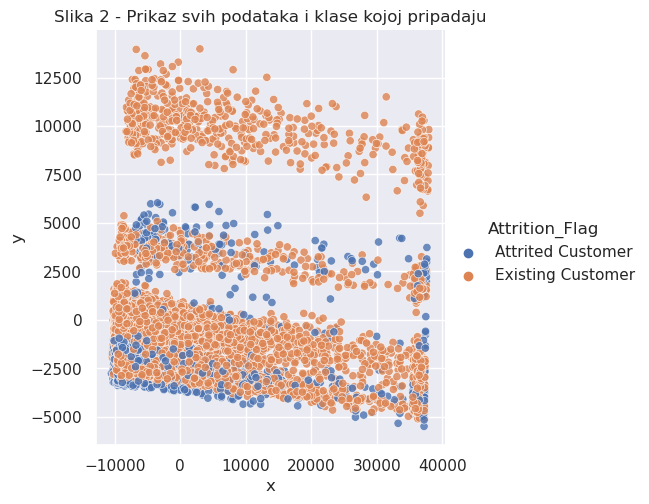

In [31]:
sns.relplot(data=vis_train_df, x="x", y="y", hue="Attrition_Flag", alpha=0.8)
plt.title("Slika 2 - Prikaz svih podataka i klase kojoj pripadaju")

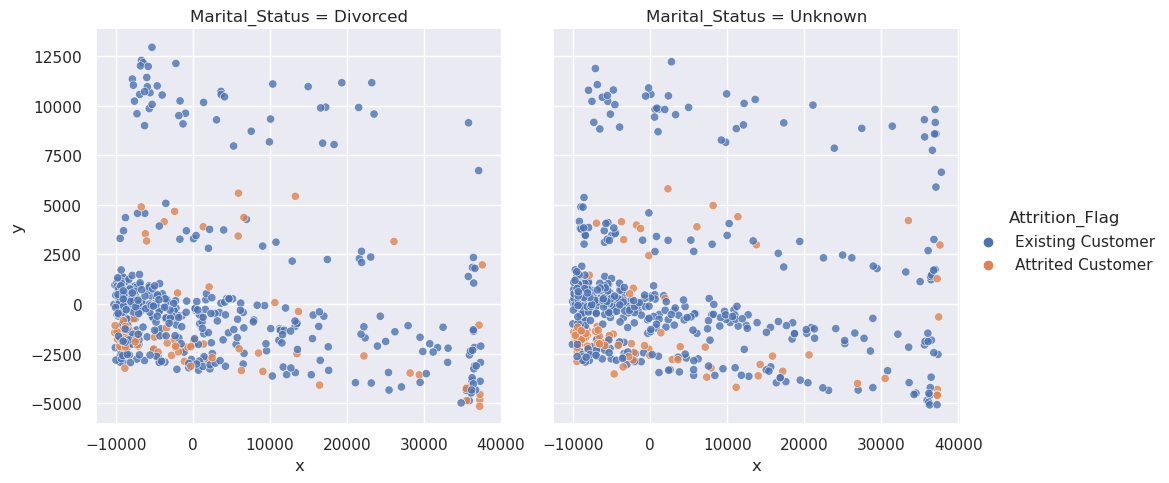

In [32]:
filtered = vis_train_df[(vis_train_df["Marital_Status"] == "Unknown") | (vis_train_df["Marital_Status"] == "Divorced")]
sns.relplot(data=filtered, x="x", y="y", hue="Attrition_Flag", col="Marital_Status", alpha=0.8)

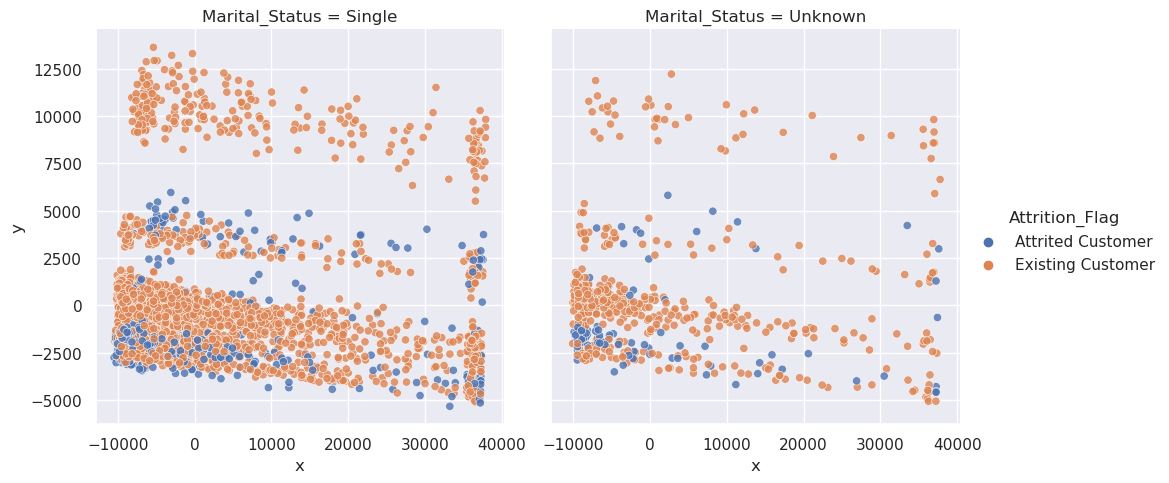

In [33]:
filtered = vis_train_df[(vis_train_df["Marital_Status"] == "Unknown") | (vis_train_df["Marital_Status"] == "Single")]
sns.relplot(data=filtered, x="x", y="y", hue="Attrition_Flag", col="Marital_Status", alpha=0.8)

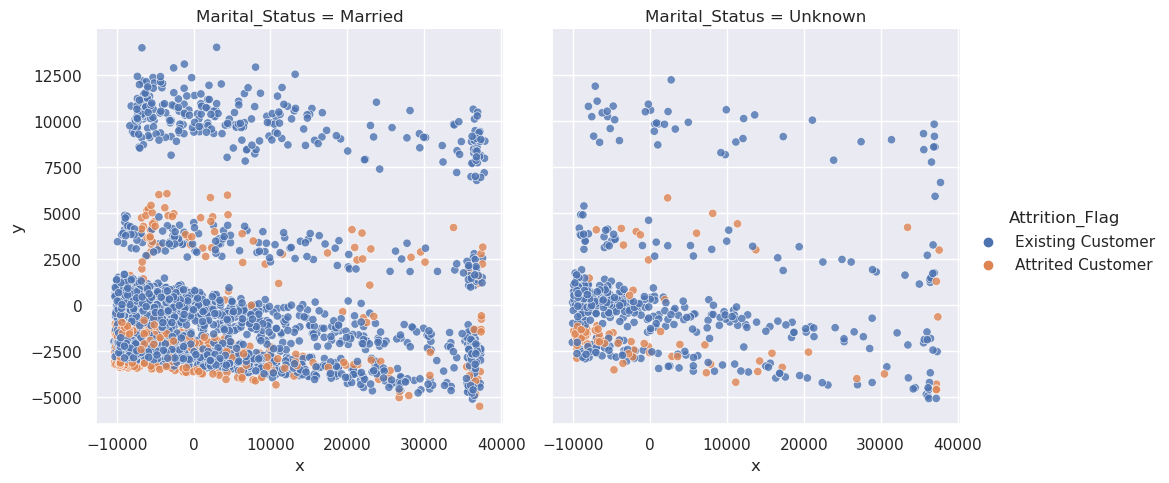

In [34]:
filtered = vis_train_df[(vis_train_df["Marital_Status"] == "Unknown") | (vis_train_df["Marital_Status"] == "Married")]
sns.relplot(data=filtered, x="x", y="y", hue="Attrition_Flag", col="Marital_Status", alpha=0.8)

Text(0.5, 1.0, 'Slika 3 - Prikaz podataka u 2d prostoru po vrednosti atributa Marital_Status')

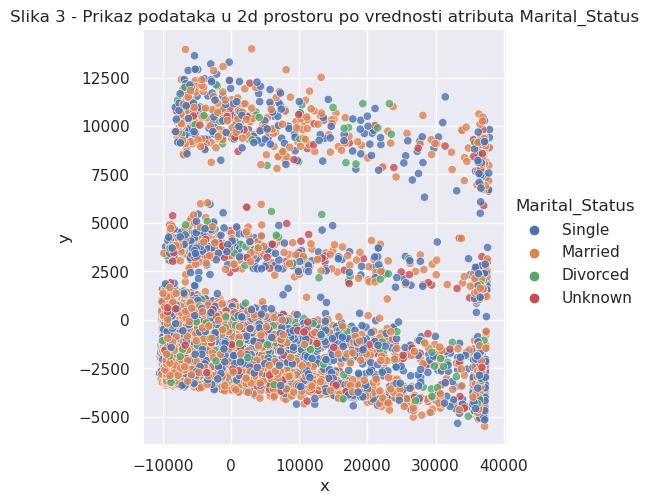

In [35]:
sns.relplot(data=vis_train_df, x="x", y="y", hue="Marital_Status", alpha=0.8)
plt.title("Slika 3 - Prikaz podataka u 2d prostoru po vrednosti atributa Marital_Status")

Text(0.5, 0.98, 'Slika 4 - Pairplots')

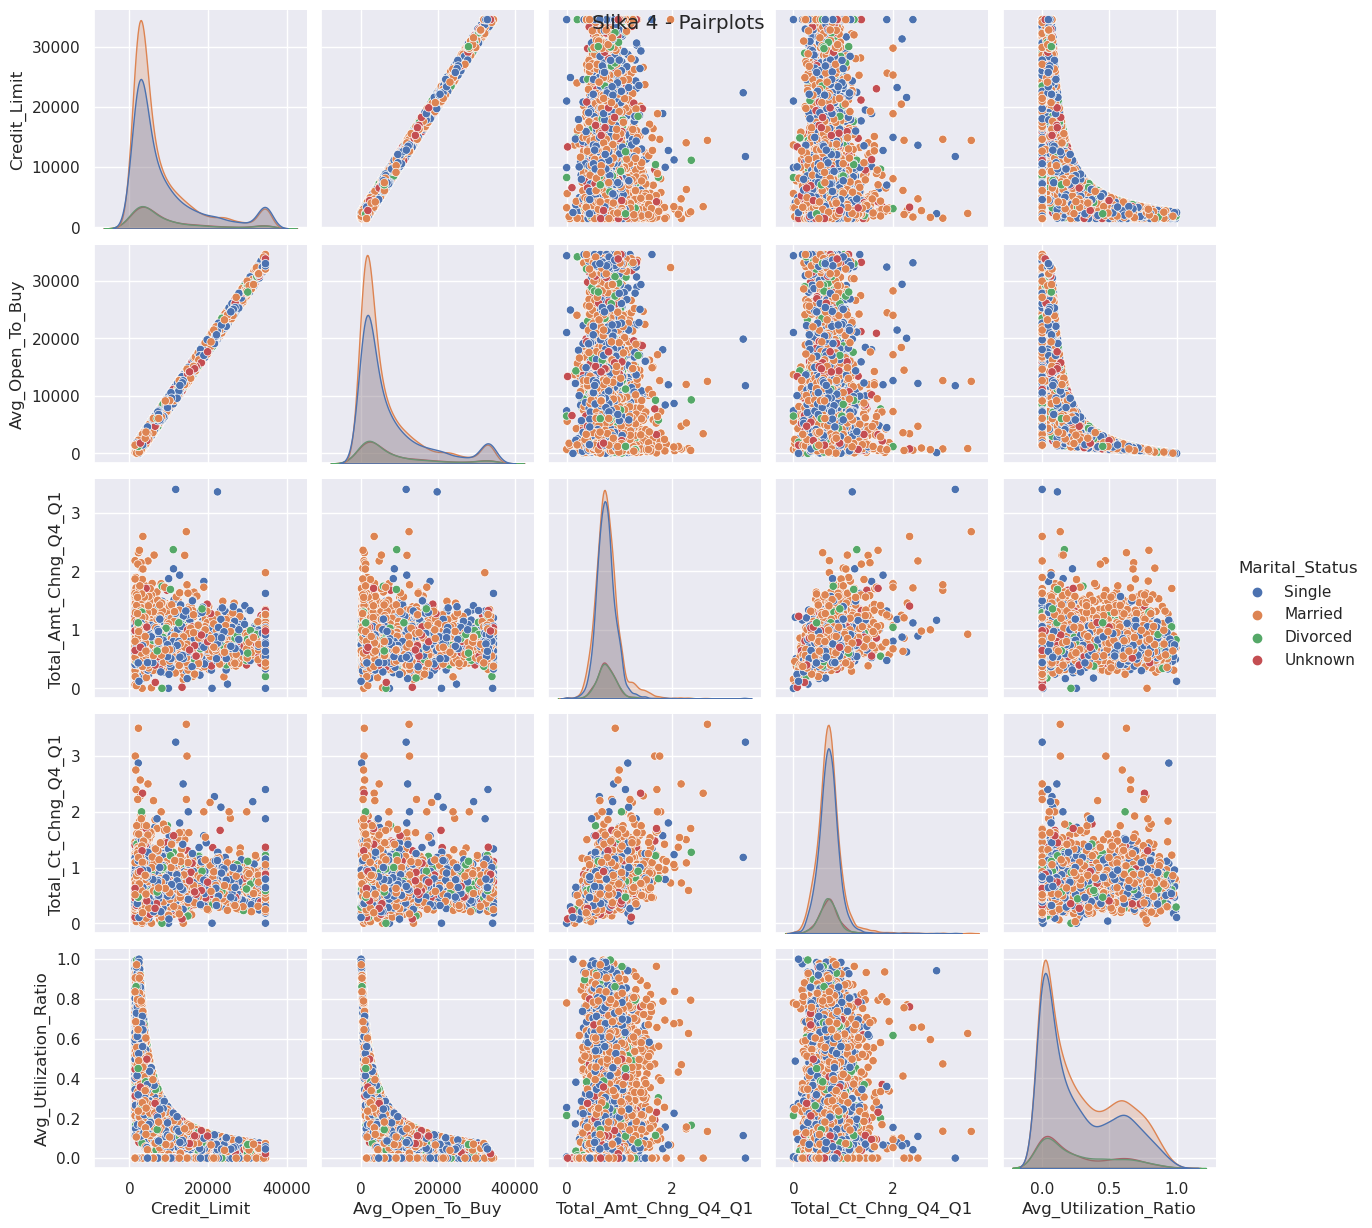

In [36]:
sns.pairplot(data=train_cp[list(train_cp.select_dtypes(include=["float64"]).columns) + ["Marital_Status"]], hue="Marital_Status")
plt.suptitle("Slika 4 - Pairplots")

In [37]:
d1 = train_cp[train_cp["Marital_Status"] == "Unknown"]
d2 = train_cp[train_cp["Marital_Status"] == "Divorced"]

Text(0.5, 0.98, 'Slika 5 - Raspodela kategoričkih atributa u zavisnosti od Marital_Status')

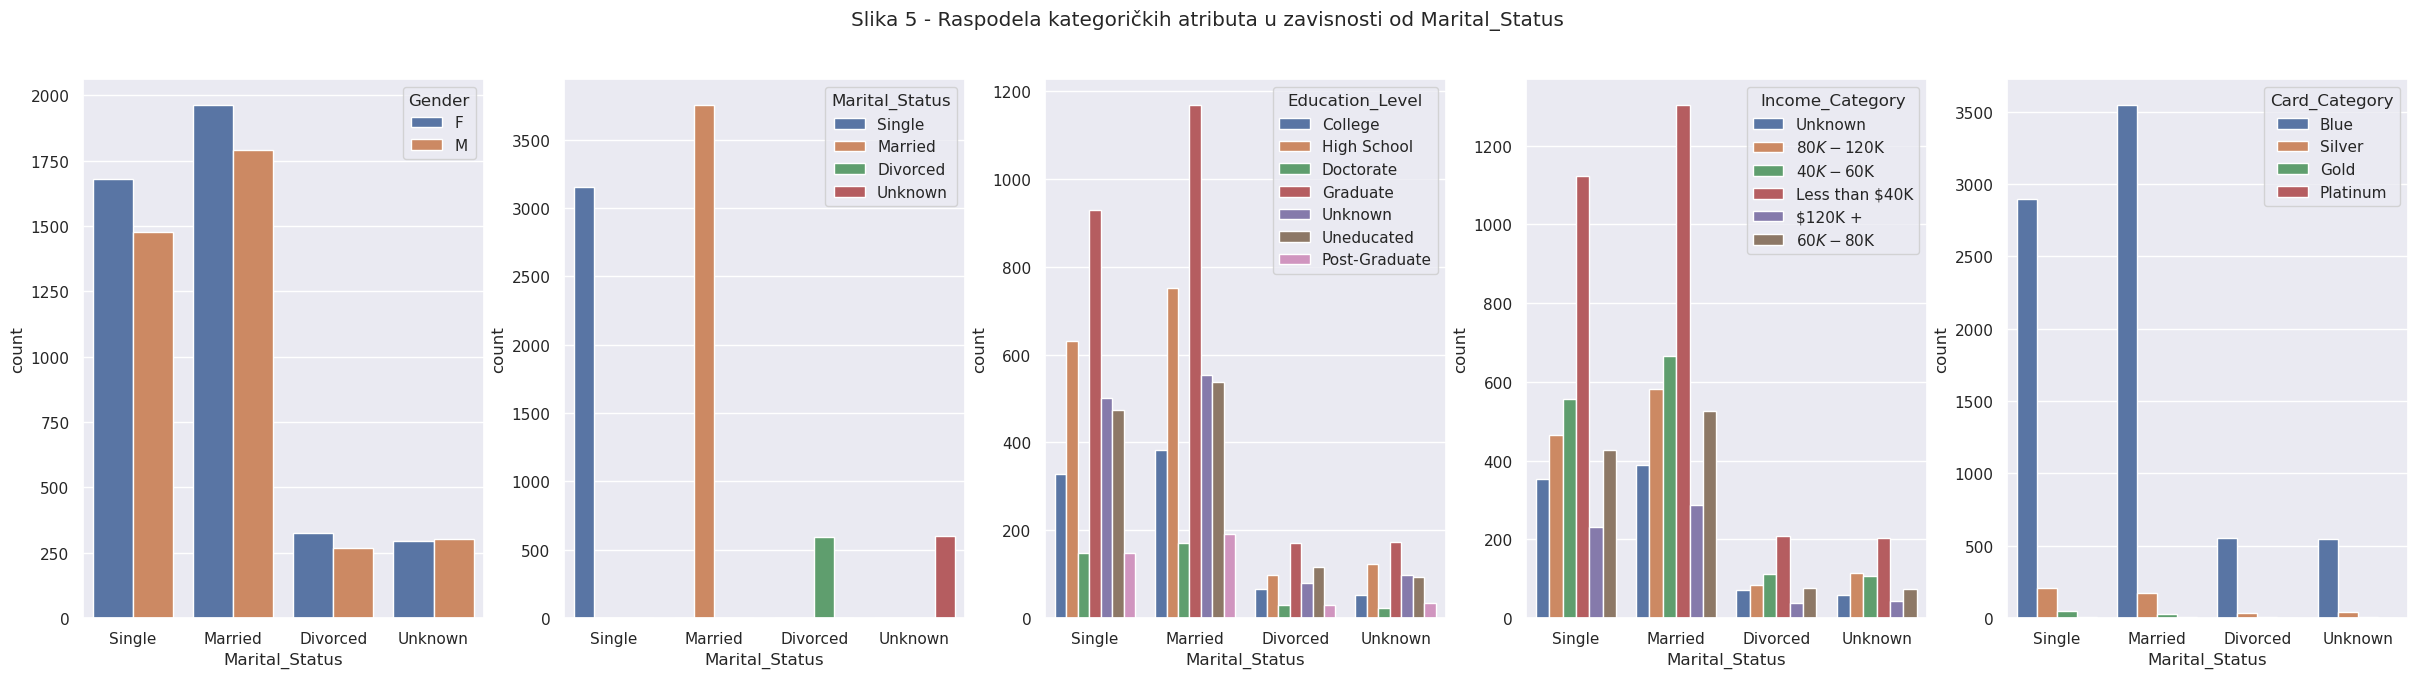

In [38]:
sfig, ax = plt.subplots(1, 5, figsize=(30, 7))

categorical = list(chain.from_iterable(attrs["categorical"].values()))

for i, col in enumerate(categorical):
    sns.countplot(data=train_cp, x="Marital_Status", hue=col, ax=ax[i])
plt.suptitle("Slika 5 - Raspodela kategoričkih atributa u zavisnosti od Marital_Status")

In [39]:
def enc_marital(marital_status):
    if marital_status == "Unknown":
        return 0
    elif marital_status == "Single":
        return 1
    elif marital_status == "Divorced":
        return 2
    elif marital_status == "Married":
        return 3
    return -1

In [40]:
marital_status_enc = train_cp["Marital_Status"].apply(enc_marital)
marital_status_enc.value_counts()

Marital_Status
3    3755
1    3156
0     599
2     591
Name: count, dtype: int64

In [41]:
chi2_marital, p_val = feat_selection.chi2(marital_status_enc.to_numpy().reshape(-1, 1), train_cp["Attrition_Flag"])
chi2_marital, p_val

(array([2.24430997]), array([0.13410672]))

In [42]:
cleaned_df = train_cp[train_cp["Marital_Status"] != "Unknown"]
marital_status_enc = cleaned_df["Marital_Status"].apply(enc_marital)
marital_status_enc.value_counts()

Marital_Status
3    3755
1    3156
2     591
Name: count, dtype: int64

In [43]:
chi2_marital, p_val = feat_selection.chi2(marital_status_enc.to_numpy().reshape(-1, 1), cleaned_df["Attrition_Flag"])
chi2_marital, p_val

(array([1.42989281]), array([0.23178193]))

Za 3 stepena slobode, i p=0.05 chi2-critical iznosi 7.815 što je značajno veće od 2.24 kolika je naša chi2 vrednost. Zbog toga zaključujemo da se hipoteza o nezavisnosti atributa *Marital_Status* i target atributa *Attrition_Flag* ne može odbaciti, tj. smatramo da su nezavisne. Isto važi i ako ukolonimo Unkown kao moguću vrednost.

**Na osnovu slike 1 koji prikazuje odnos target klase u zavisnosti od vrednosti atributa *Marital_Status* možemo da primetimo da je raspodela gotovo identična za vrednosti **Unknown** i **Divorced**, kao i da postoji gotovo identičan broj vrsta sa ove dve vrednosti. Da bismo dalje ispitali ovo tvrđenje odrađena je vizuelizacija svih podataka u 2d prostoru korišćenjem PCA algoritma za redukciju dimenzionalnosti. Posmatrane su sličnosti na dijagramima rasipanja za svaku moguću vrednost atributa *Marital_Status* i vrednosti Unknown. Sa ovih dijagrama takođe možemo da uočimo sličnost između vrednosti Divorced i Unknown. Međutim, ove sličnosti su najevidentnije posmatranjem slika 4 i 5.<font color='cyan'>Na osnovu slike 4 ne samo što uočavamo da je raspodela numeričkih atributa gotovo identična za vrednosti Unknown i Divorced, već se uočava i ogromna sličnost između vrednosti Single i Married. Na osnovu slike 5 zaključujemo istu stvar i za kategoričke atribute. Ovi zakljuci sugerišu da vrednost atributa *Marital_Status* ne utiče bitno na to kojoj klasi korisnik pripada. Da bismo ovo potvrdili koristili smo hi-kvadrat test za proveru nezavisnosti između kategoričkih atributa i rezultati ovog testa su nam i potvrdili ovu teoriju.</font><br>
<font color='red'>Zbog navedenih zaključaka, odbacićemo ovaj atribut u nastavku!</font>**

**Još jedan bitan podatak smo otkrili prikazom pairplot-ova je da su atributi *Avg_Open_To_Buy* i *Credit_Limit* potpuno linearno korelisani, što nam i potvrđuje matrica korelacije sa slike 6 ispod. <font color='red'>Zbog toga ćemo odbaciti i atribut *Avg_Open_To_Buy*</font>**.

Text(0.5, 1.0, 'Slika 6 - Matrica korelacije')

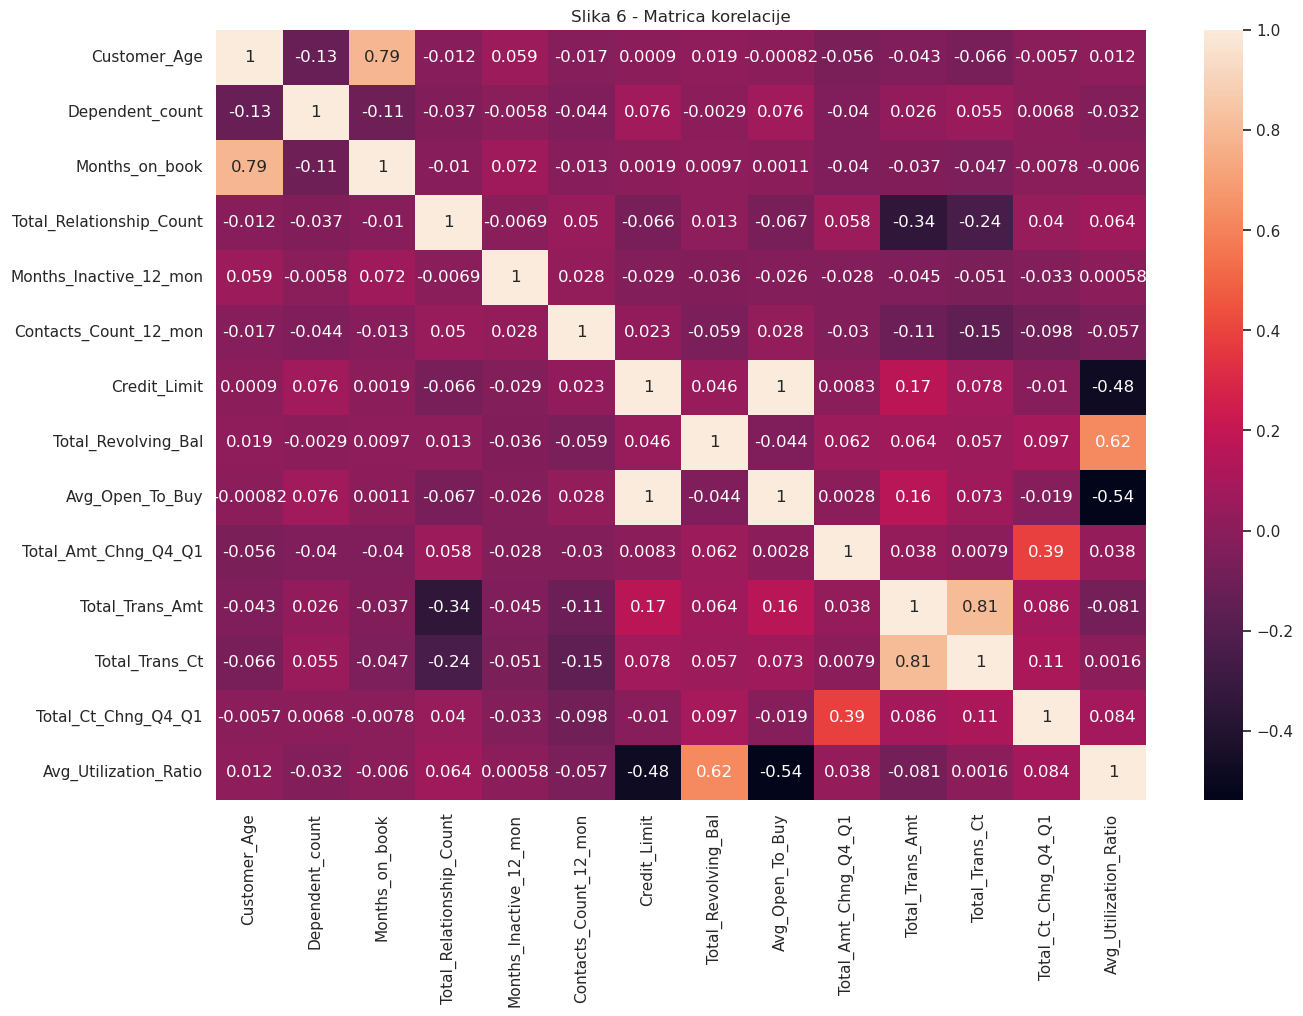

In [44]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_cp[attrs["numerical"]].corr(), annot=True)
plt.title("Slika 6 - Matrica korelacije")

Osim pomenute korelacije, uočavamo i da postoji visoka korelacija između atributa *Total_Trans_Amt* i *Total_Trans_Ct* (što je i logično). Kasnije ćemo se pozabaviti ovim problemom. Takođe postoji visoka korelacija između atributa *Customer_Age* i *Months_on_book* i *Total_Revolving_Bal* i *Avg_Utilization_Ratio*.

In [45]:
train_cp = train_cp.drop(["Marital_Status", "Avg_Open_To_Buy"], axis=1)

Sličnu analizu sprovodimo i za atribut *Education_Level*.

Text(0.5, 1.0, 'Slika 7 - Raspodela target klase u zavisnoti od Education_Level vrednosti')

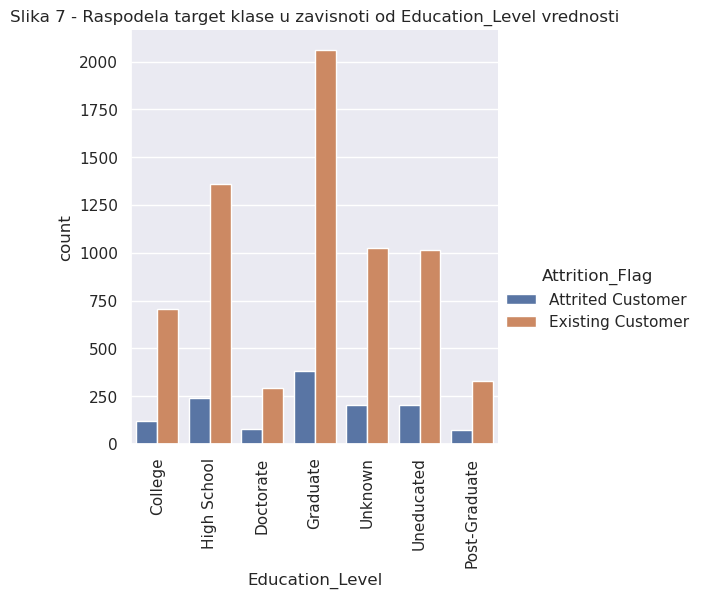

In [46]:
p = sns.catplot(data=train_cp, x="Education_Level", hue="Attrition_Flag", kind="count")

for ax in p.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title("Slika 7 - Raspodela target klase u zavisnoti od Education_Level vrednosti")

Text(0.5, 0.98, 'Slika 8 - Pairplots')

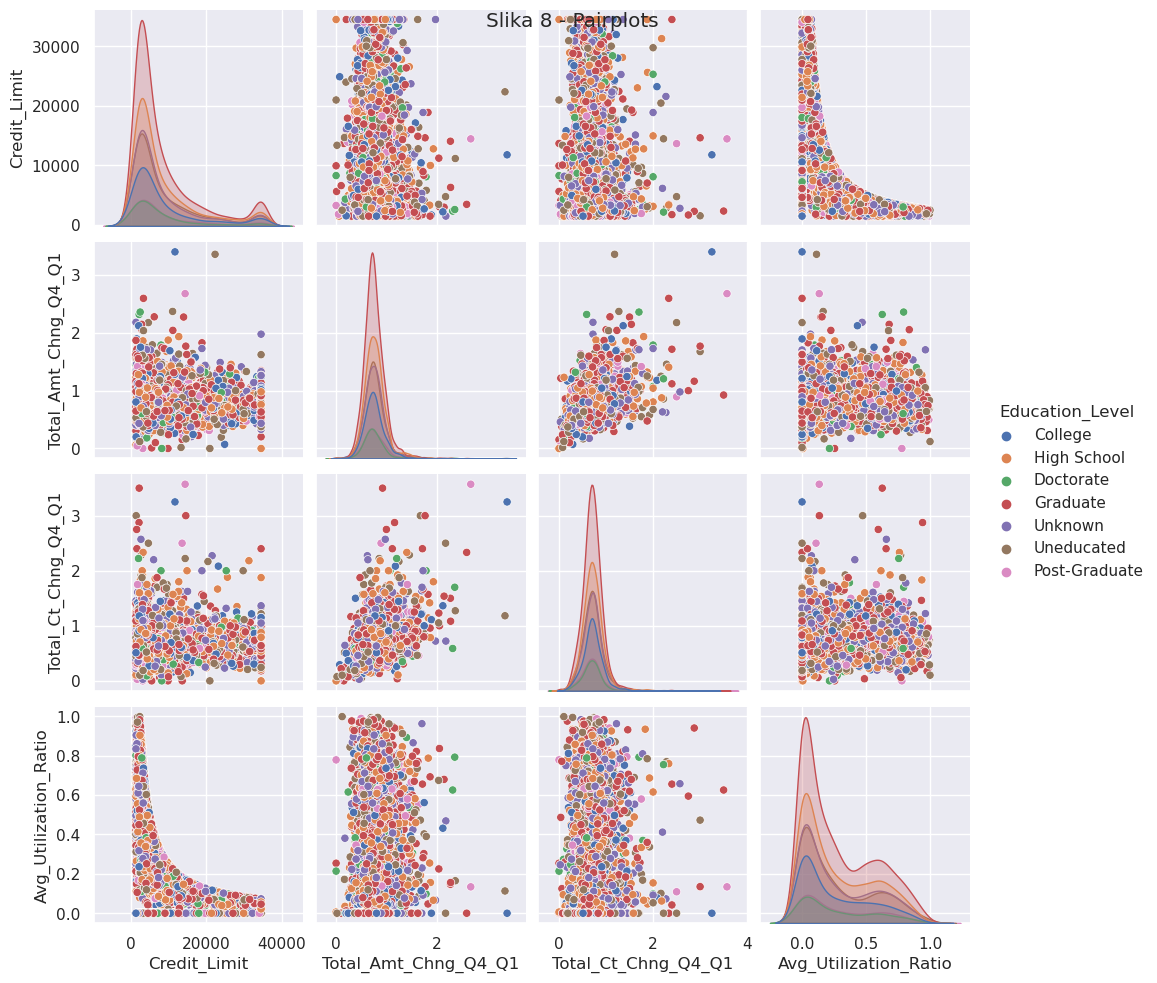

In [47]:
sns.pairplot(data=train_cp[list(train_cp.select_dtypes(include=["float64"]).columns) + ["Education_Level"]], hue="Education_Level")
plt.suptitle("Slika 8 - Pairplots")

Text(0.5, 0.98, 'Slika 9 - Raspodela kategoričkih atributa u zavisnosti od Education_Level')

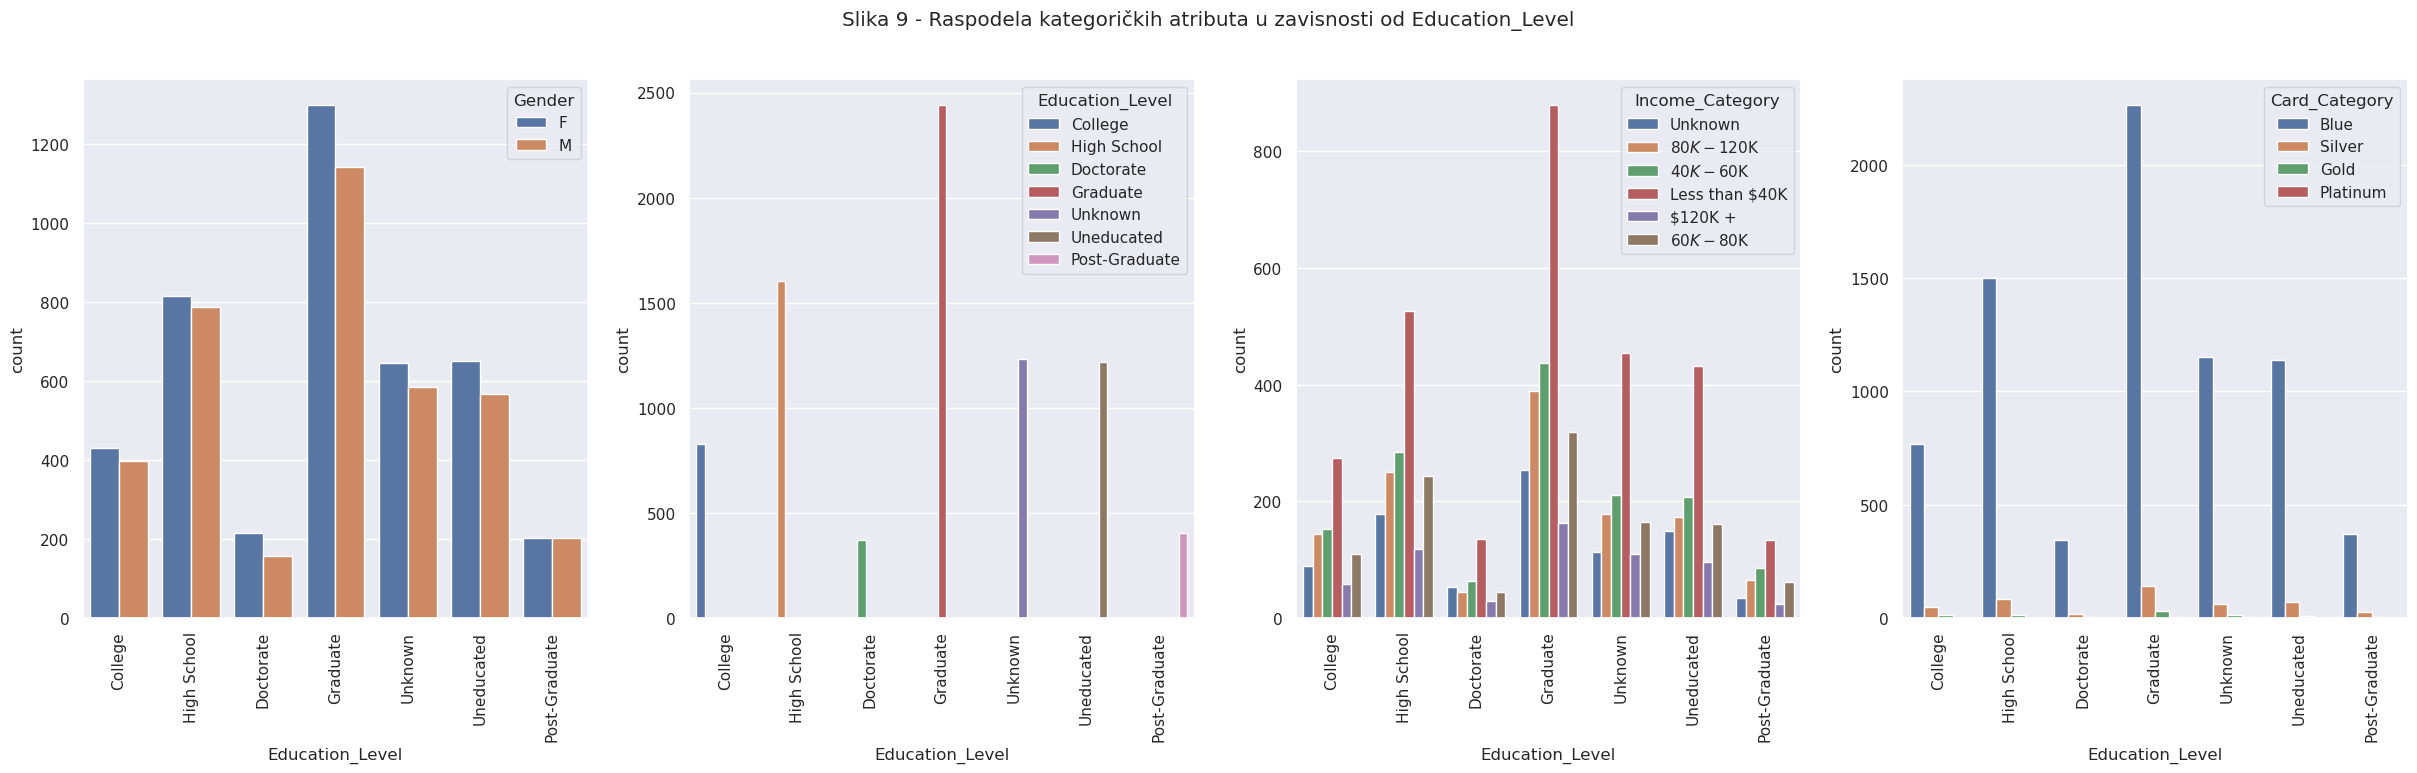

In [48]:
sfig, ax = plt.subplots(1, 4, figsize=(30, 7))

categorical = list(chain.from_iterable(attrs["categorical"].values()))
categorical.remove("Marital_Status")

for i, col in enumerate(categorical):
    p = sns.countplot(data=train_cp, x="Education_Level", hue=col, ax=ax[i])
    p.set_xticklabels(labels=p.get_xticklabels(), rotation=90)

plt.suptitle("Slika 9 - Raspodela kategoričkih atributa u zavisnosti od Education_Level")

In [49]:
def enc_edu(edu_level):
    if edu_level == "Unknown":
        return 0
    elif edu_level == "Uneducated":
        return 1
    elif edu_level == "High School":
        return 2
    elif edu_level == "College":
        return 3
    elif edu_level == "Graduate":
        return 4
    elif edu_level == "Post-Graduate":
        return 5
    elif edu_level == "Doctorate":
        return 6
    return -1

In [50]:
education_level_enc = train_cp["Education_Level"].apply(enc_edu)
education_level_enc.value_counts()

Education_Level
4    2442
2    1603
0    1232
1    1219
3     829
5     404
6     372
Name: count, dtype: int64

In [51]:
chi2_education, p_val = feat_selection.chi2(education_level_enc.to_numpy().reshape(-1, 1), train_cp["Attrition_Flag"])
chi2_education, p_val

(array([0.61852657]), array([0.43159535]))

In [52]:
cleaned_df = train_cp[train_cp["Education_Level"] != "Unknown"]
edu_level_enc = cleaned_df["Education_Level"].apply(enc_edu)
edu_level_enc.value_counts()

Education_Level
4    2442
2    1603
1    1219
3     829
5     404
6     372
Name: count, dtype: int64

In [53]:
chi2_education, p_val = feat_selection.chi2(edu_level_enc.to_numpy().reshape(-1, 1), cleaned_df["Attrition_Flag"])
chi2_education, p_val

(array([1.41727517]), array([0.23385242]))

In [54]:
cleaned_df = train_cp[(train_cp["Education_Level"] != "Unknown") & (train_cp["Income_Category"] != "Unknown")]
edu_level_enc = cleaned_df["Education_Level"].apply(enc_edu)
edu_level_enc.value_counts()

Education_Level
4    2188
2    1425
1    1070
3     739
5     370
6     318
Name: count, dtype: int64

In [55]:
chi2_education, p_val = feat_selection.chi2(edu_level_enc.to_numpy().reshape(-1, 1), cleaned_df["Income_Category"])
chi2_education, p_val

(array([1.89777194]), array([0.75455428]))

**I u slučaju atributa *Education_Level* možemo da izvedemo isti zaključak kao i za *Marital_Status*, kako na osnovu grafikona, tako i na osnovu chi2 vrednosti.<br>
<font color='red'>Zbog toga odbacujemo i ovaj atribut u nastavku!</font>**

In [56]:
train_cp = train_cp.drop(["Education_Level"], axis=1)
train_cp.shape

(8101, 17)

Na kraju, na isti način analiziramo i poslednji atribut koji ima nedostajuće vrednosti a to je *Income_Category*.

Text(0.5, 1.0, 'Slika 10 - Raspodela target klase u zavisnoti od Income_Category vrednosti')

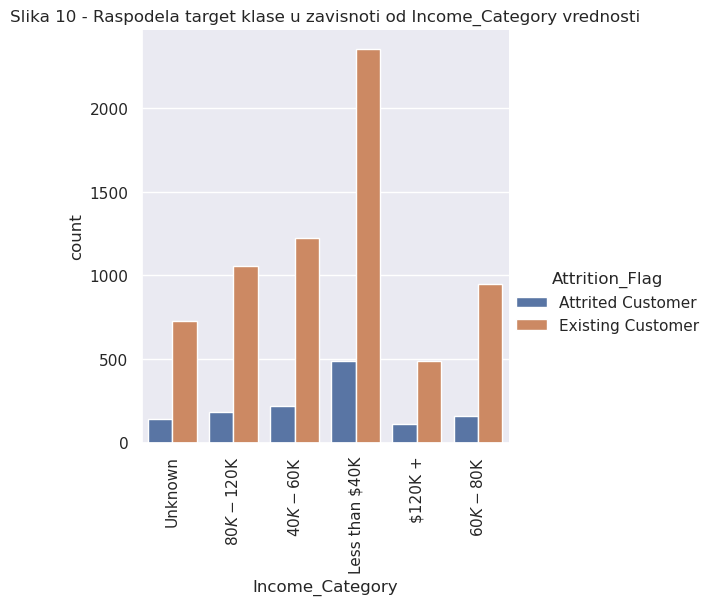

In [57]:
p = sns.catplot(data=train_cp, x="Income_Category", hue="Attrition_Flag", kind="count")

for ax in p.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title("Slika 10 - Raspodela target klase u zavisnoti od Income_Category vrednosti")

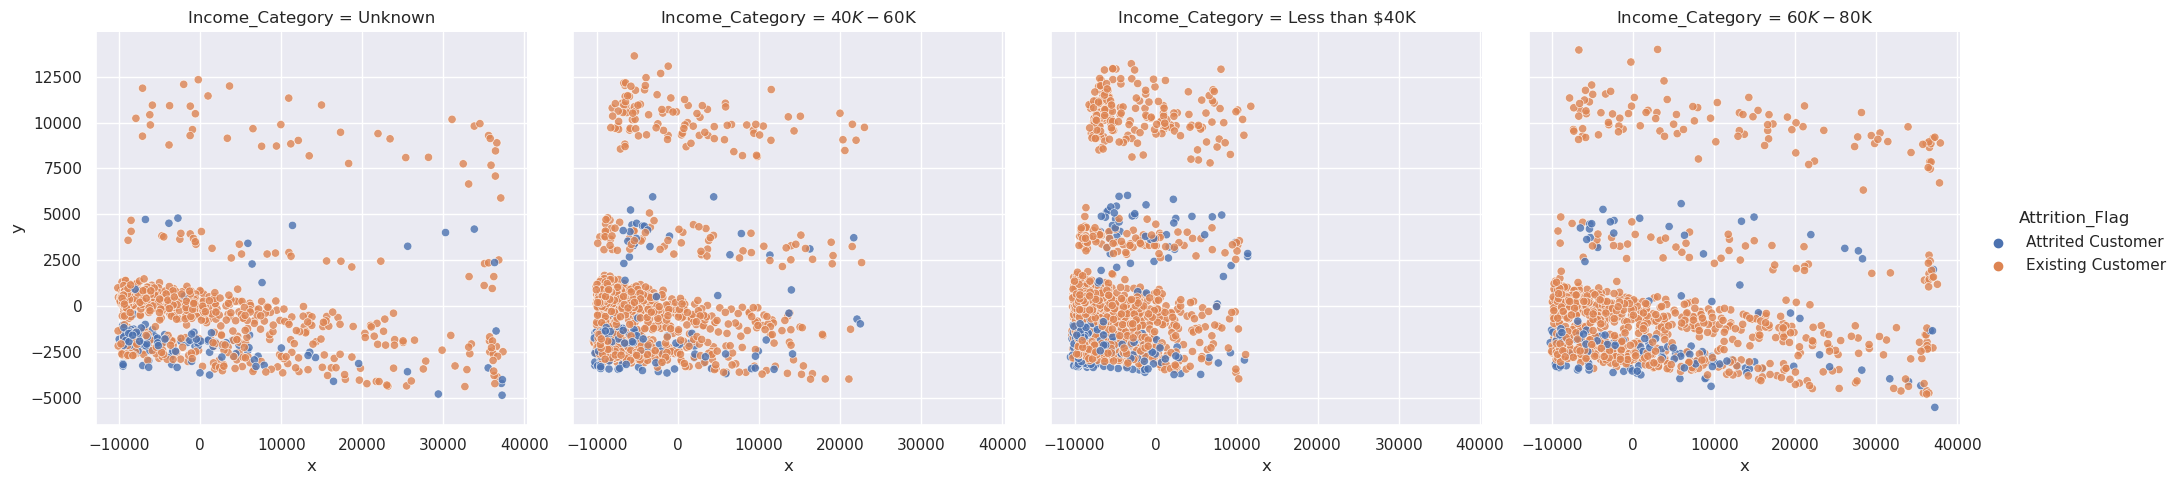

In [58]:
filtered = vis_train_df[(vis_train_df["Income_Category"] == "Unknown") | (vis_train_df["Income_Category"] == "Less than $40K") | (vis_train_df["Income_Category"] == "$40K - $60K") | (vis_train_df["Income_Category"] == "$60K - $80K")]
sns.relplot(data=filtered, x="x", y="y", hue="Attrition_Flag", col="Income_Category", alpha=0.8)

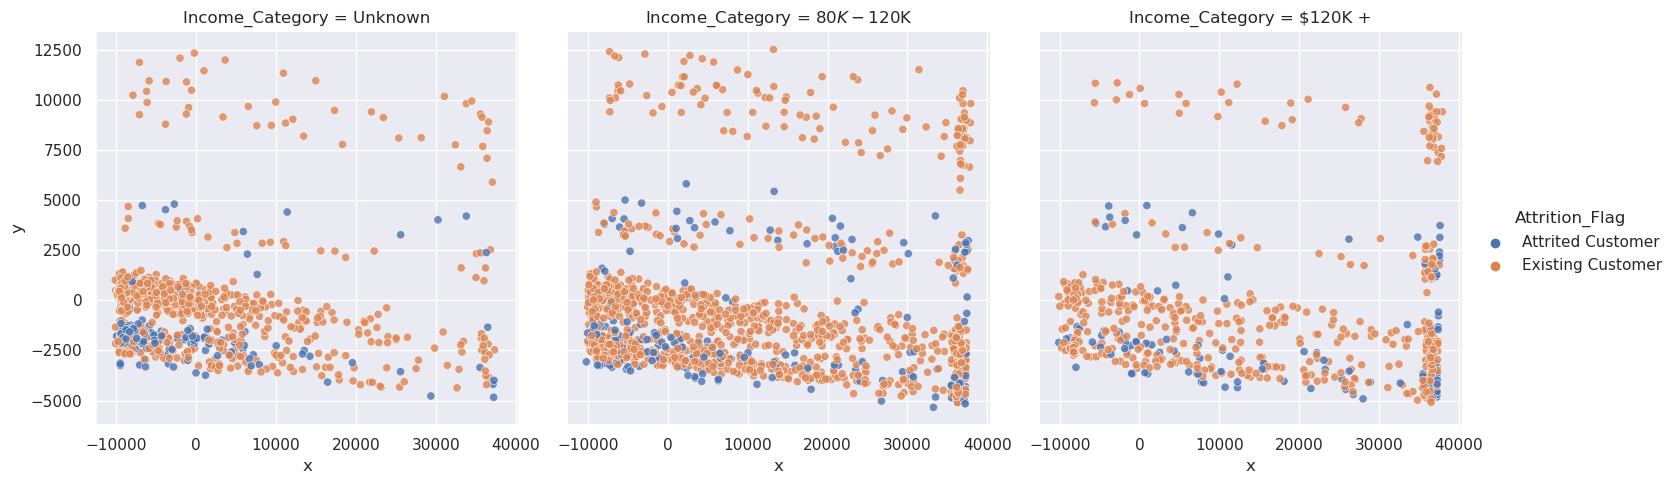

In [59]:
filtered = vis_train_df[(vis_train_df["Income_Category"] == "Unknown") | (vis_train_df["Income_Category"] == "$80K - $120K") | (vis_train_df["Income_Category"] == "$120K +")]
sns.relplot(data=filtered, x="x", y="y", hue="Attrition_Flag", col="Income_Category", alpha=0.8)

Text(0.5, 0.98, 'Slika 11 - Pairplots')

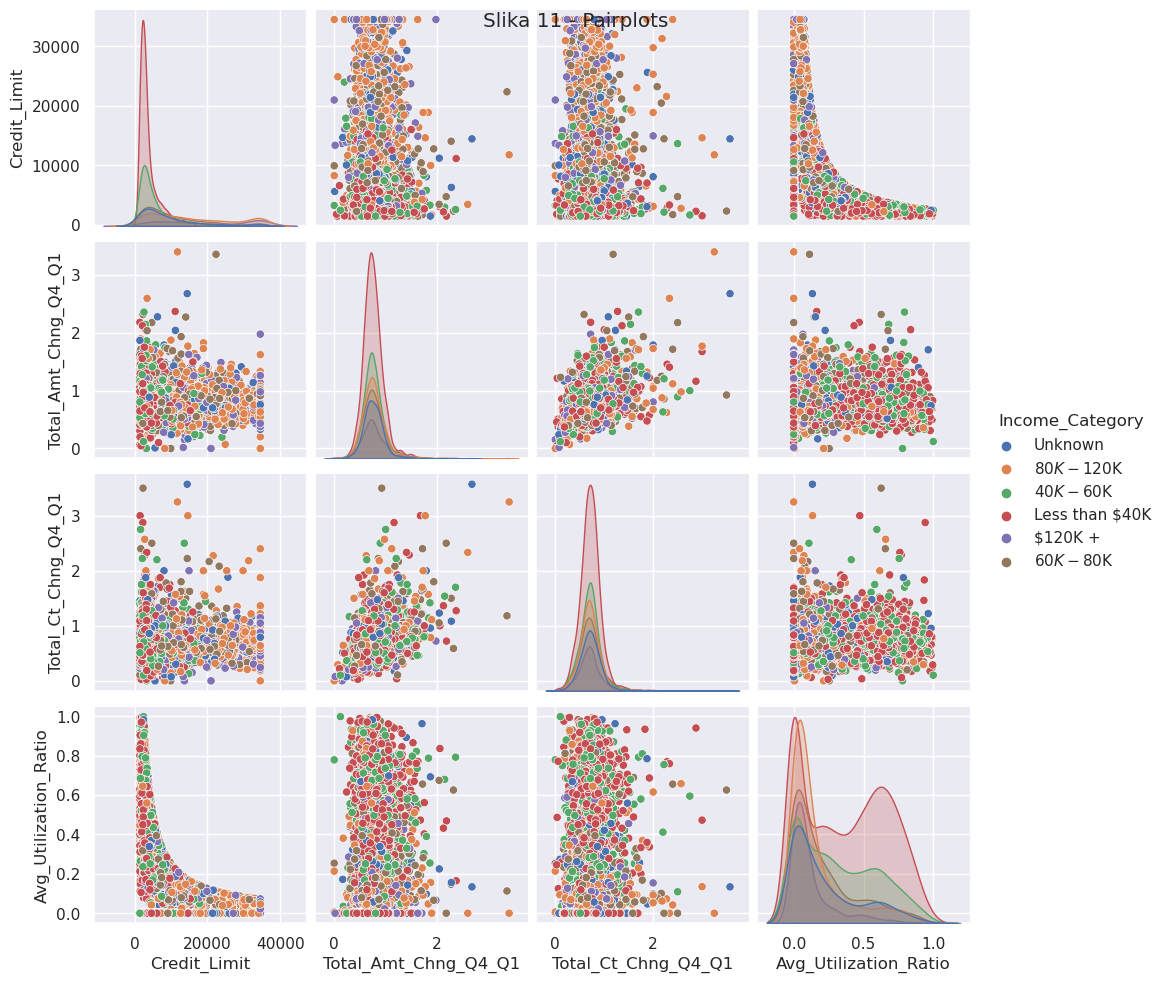

In [60]:
sns.pairplot(data=train_cp[list(train_cp.select_dtypes(include=["float64"]).columns) + ["Income_Category"]], hue="Income_Category")
plt.suptitle("Slika 11 - Pairplots")

Text(0.5, 0.98, 'Slika 12 - Raspodela kategoričkih atributa u zavisnosti od Income_Category')

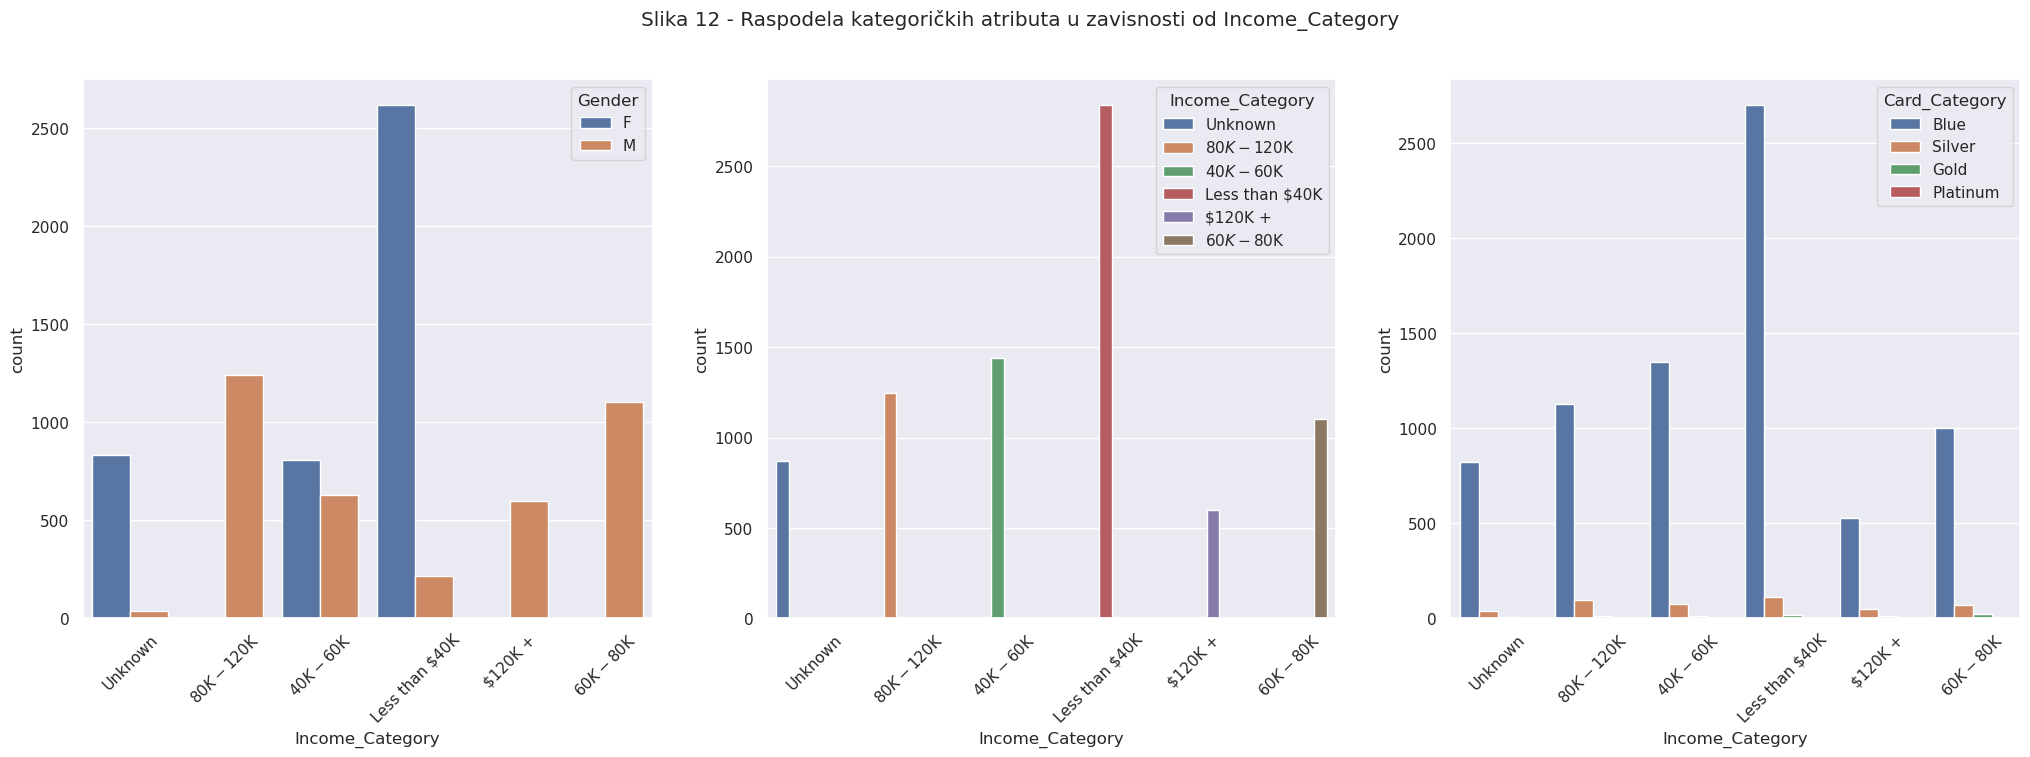

In [61]:
sfig, ax = plt.subplots(1, 3, figsize=(25, 7))

categorical = list(chain.from_iterable(attrs["categorical"].values()))
categorical.remove("Marital_Status")
categorical.remove("Education_Level")

for i, col in enumerate(categorical):
    p = sns.countplot(data=train_cp, x="Income_Category", hue=col, ax=ax[i])
    p.set_xticklabels(labels=p.get_xticklabels(), rotation=45)

plt.suptitle("Slika 12 - Raspodela kategoričkih atributa u zavisnosti od Income_Category")

In [62]:
def enc_income(income_cat):
    if income_cat == "Unknown":
        return 0
    elif income_cat == "Less than $40K":
        return 1
    elif income_cat == "$40K - $60K":
        return 2
    elif income_cat == "$60K - $80K":
        return 3
    elif income_cat == "$80K - $120K":
        return 4
    elif income_cat == "$120K +":
        return 5
    return -1

In [63]:
income_cat_enc = train_cp["Income_Category"].apply(enc_income)
income_cat_enc.value_counts()

Income_Category
1    2838
2    1442
4    1244
3    1104
0     873
5     600
Name: count, dtype: int64

In [64]:
chi2_income, p_val = feat_selection.chi2(income_cat_enc.to_numpy().reshape(-1, 1), train_cp["Attrition_Flag"])
chi2_income, p_val

(array([0.65823063]), array([0.41718529]))

In [65]:
cleaned_df = train_cp[train_cp["Income_Category"] != "Unknown"]
income_cat_enc = cleaned_df["Income_Category"].apply(enc_income)
income_cat_enc.value_counts()

Income_Category
1    2838
2    1442
4    1244
3    1104
5     600
Name: count, dtype: int64

In [66]:
chi2_income, p_val = feat_selection.chi2(income_cat_enc.to_numpy().reshape(-1, 1), cleaned_df["Attrition_Flag"])
chi2_income, p_val

(array([0.46207365]), array([0.49665644]))

**<font color='cyan'>Bez obzira na niske vrednosti za chi2, možemo da primetimo da za različite vrednosti atributa *Income_Category* ipak postoje neke razlike u raspodelama ostalih atributa - ova razlika je najočiglednija za *Avg_Utilization_Ratio* i *Credit_Limit*. Takođe, primećujemo da odnos polova nije isti za različite kategorije, čak postoje i drastične razlike (npr. sve osobe koje zarađuju preko $60K godišnje su muškog pola). Zbog ovih stvari nećemo odbaciti ovaj atribut (a zbog toga što ove nedostajuće vrednosti nisu MCAR tipa ne možemo ni odbaciti te vrste jer ćemo izgubiti značajniju količinu podataka), za popunjavanje ovih vrednosti koristićemo</font> - <font color='red'>IterativeImputer</font>.**

Pre toga, proverićemo da li postoje izraziti outlier-i u podacima i izbaciti ih.

### Detekcija outlier-a

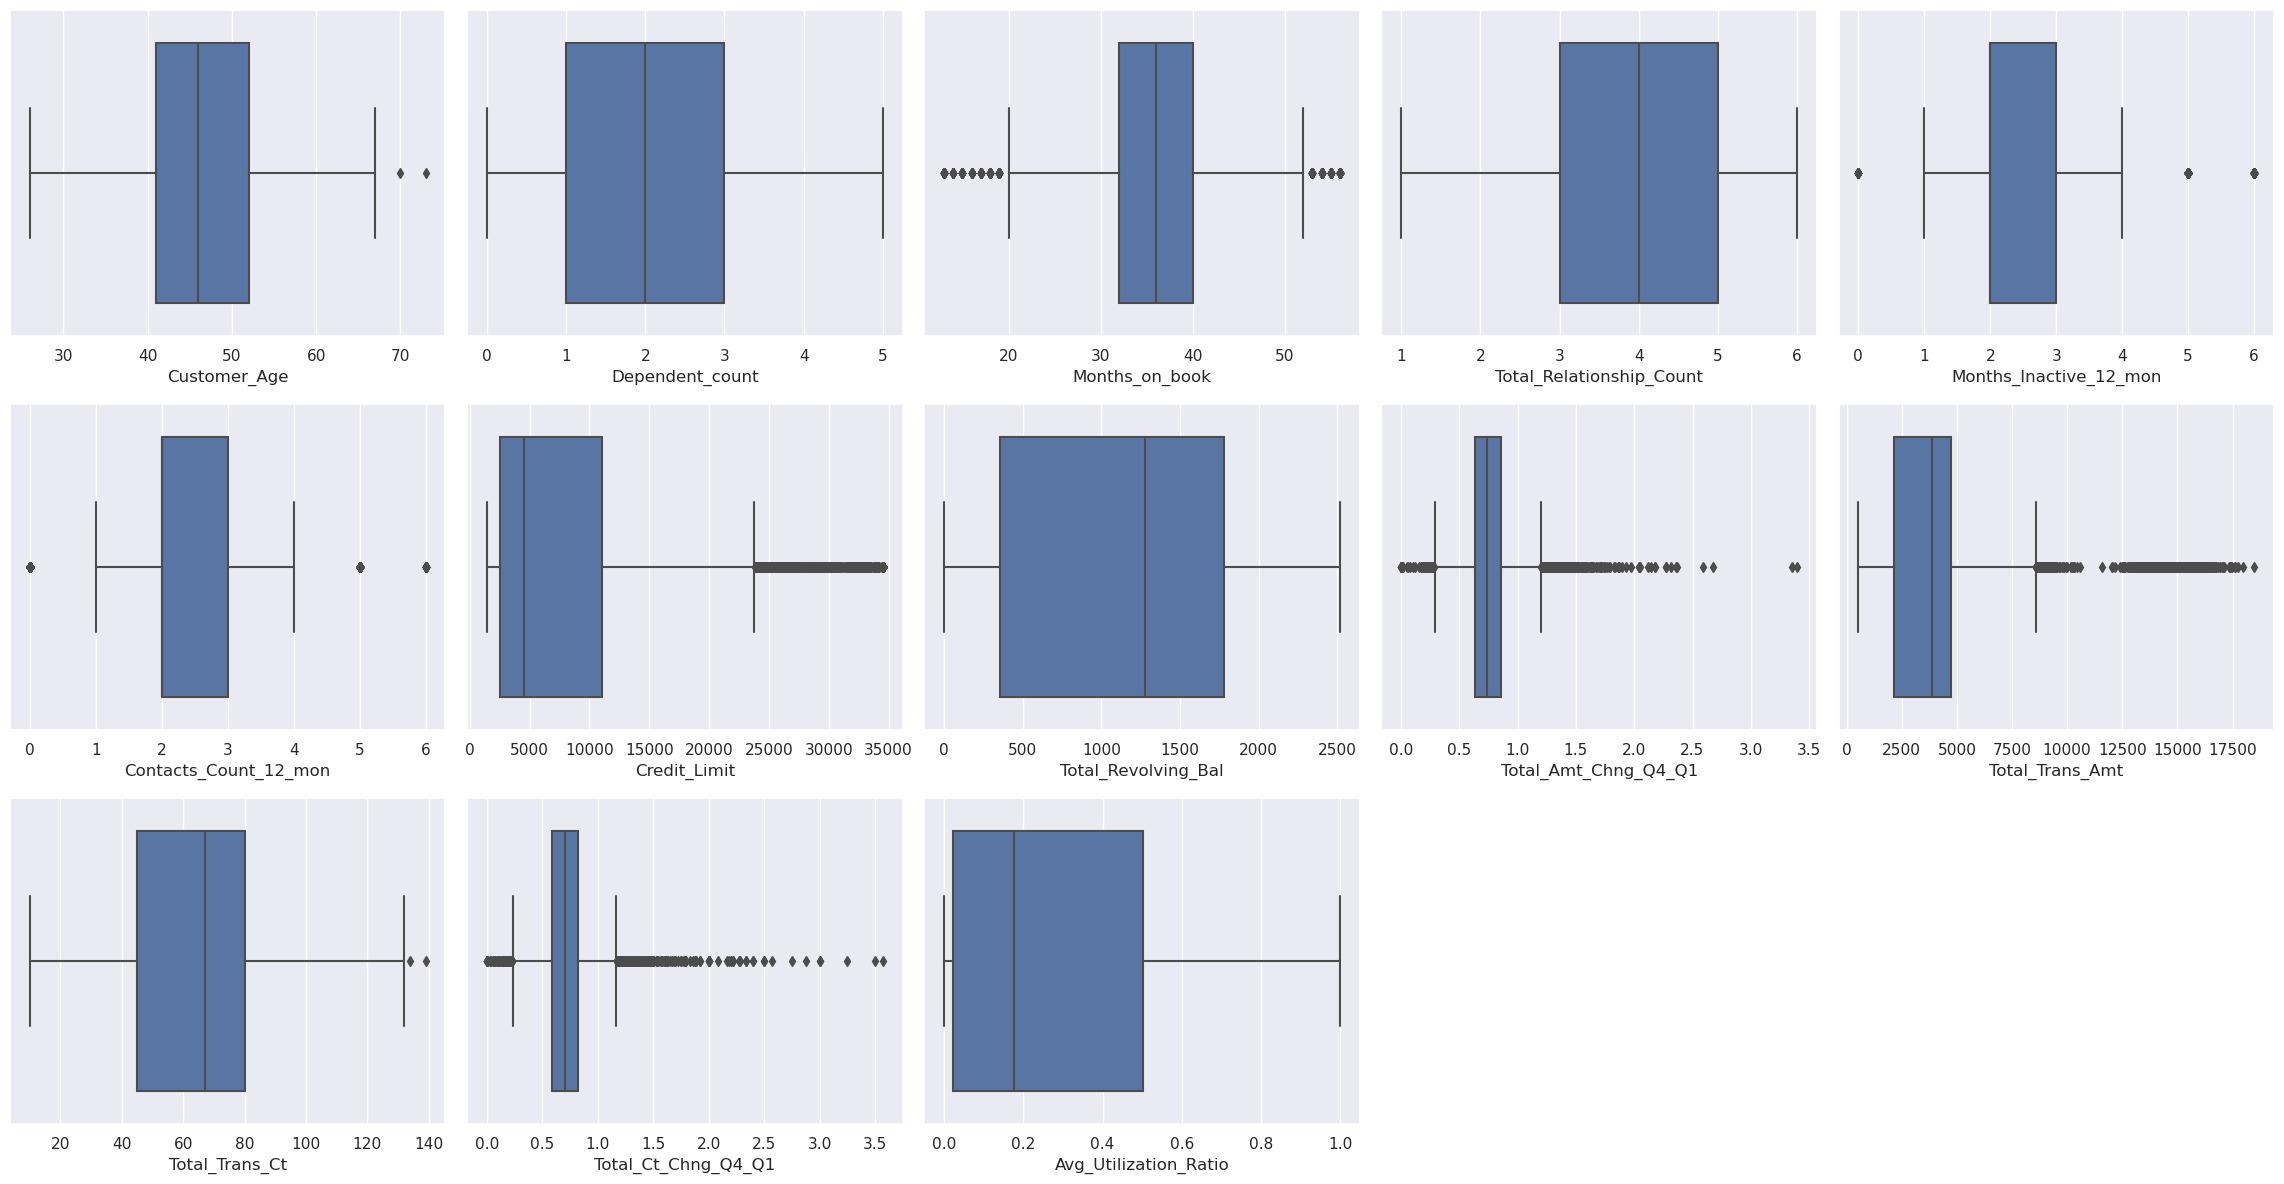

In [67]:
fig, ax = plt.subplots(3, 5, figsize=(23, 12))
ax = ax.flatten()

num_attrs = attrs["numerical"].copy()
num_attrs.remove("Avg_Open_To_Buy")

for i, col in enumerate(num_attrs):
    sns.boxplot(data=train_cp, x=col, ax=ax[i])

fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
fig.tight_layout()

<Axes: xlabel='Gender', ylabel='Total_Amt_Chng_Q4_Q1'>

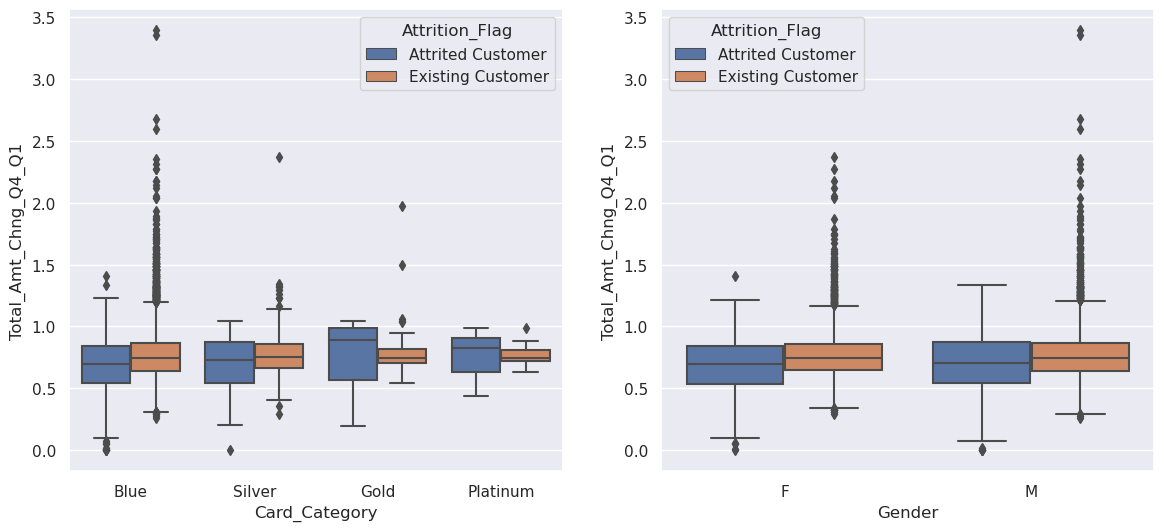

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=train_cp, x="Card_Category", y="Total_Amt_Chng_Q4_Q1", hue="Attrition_Flag", ax=ax[0])
sns.boxplot(data=train_cp, x="Gender", y="Total_Amt_Chng_Q4_Q1", hue="Attrition_Flag", ax=ax[1])

<Axes: xlabel='Gender', ylabel='Total_Ct_Chng_Q4_Q1'>

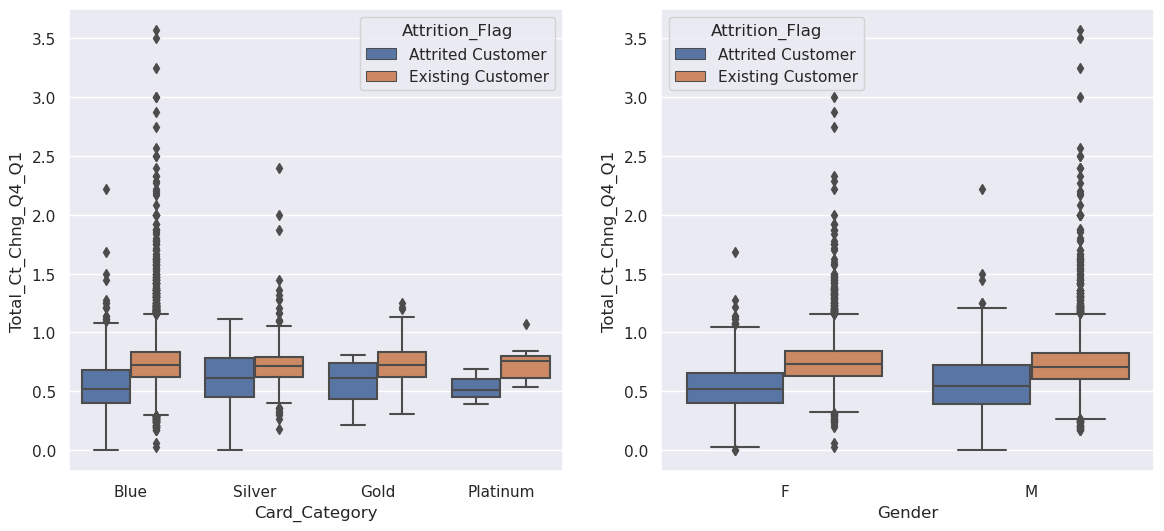

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=train_cp, x="Card_Category", y="Total_Ct_Chng_Q4_Q1", hue="Attrition_Flag", ax=ax[0])
sns.boxplot(data=train_cp, x="Gender", y="Total_Ct_Chng_Q4_Q1", hue="Attrition_Flag", ax=ax[1])

Možemo da vidimo da aktuelni korisnici u proseku imaju neznatno veću promenu transakcija u Q4 u odnosu na Q1.

<Axes: xlabel='Gender', ylabel='Credit_Limit'>

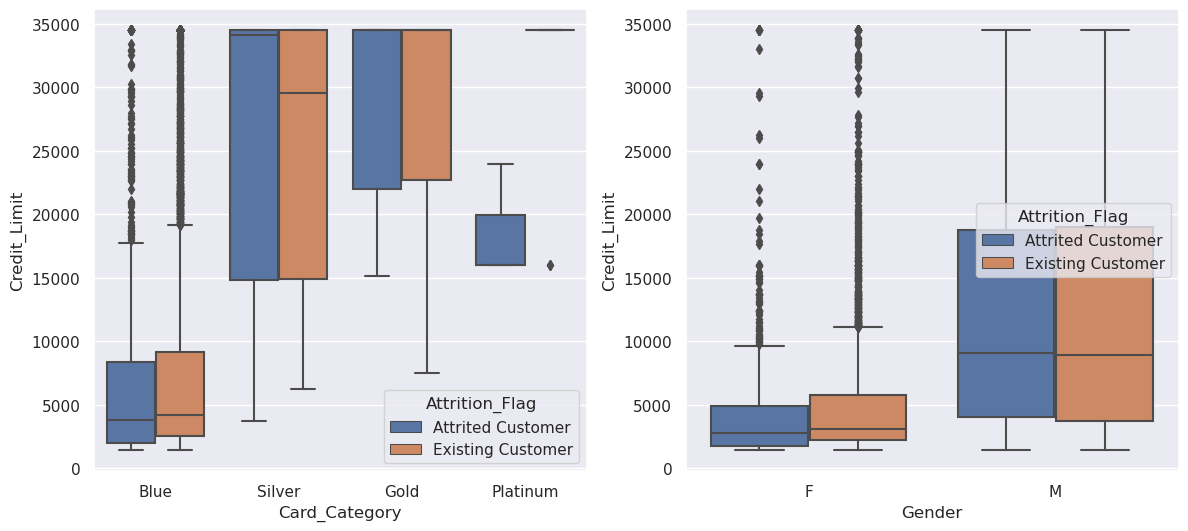

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=train_cp, x="Card_Category", y="Credit_Limit", hue="Attrition_Flag", ax=ax[0])
sns.boxplot(data=train_cp, x="Gender", y="Credit_Limit", hue="Attrition_Flag", ax=ax[1])

Na osnovu ovog grafikona vidimo da svi korisnici koji nisu napustili banku imaju maksimalan mogući limit (ili je unlimited).

<Axes: xlabel='Gender', ylabel='Total_Trans_Amt'>

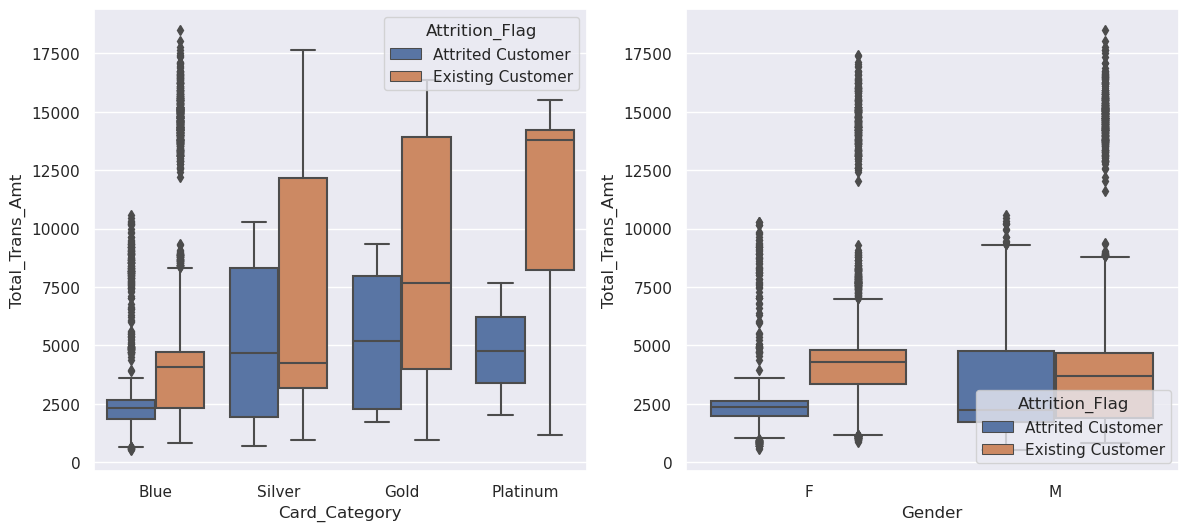

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=train_cp, x="Card_Category", y="Total_Trans_Amt", hue="Attrition_Flag", ax=ax[0])
sns.boxplot(data=train_cp, x="Gender", y="Total_Trans_Amt", hue="Attrition_Flag", ax=ax[1])

Aktuelni korisnici imaju veću prosečnu vrednost za *Total_Trans_Amt* i ova vrednost (logično) raste sa većom kategorijom kartice. Izuzetak je Silver kartica, kod koje ne postoji znazna razlika u odnosu na Blue karticu. Ovo se odnosi na postojeće korisnike.<br>
Za korisnike koji su napustili banku možemo da vidimo da je prosečni totalni iznos transakcija gotovo isti za sve kategorije kartica, osim za Blue, gde je znazno niži.<br>
U svakom slučaju, prosečni totalni iznos transakcija je viši za aktuelne korisnike.

<Axes: xlabel='Gender', ylabel='Months_on_book'>

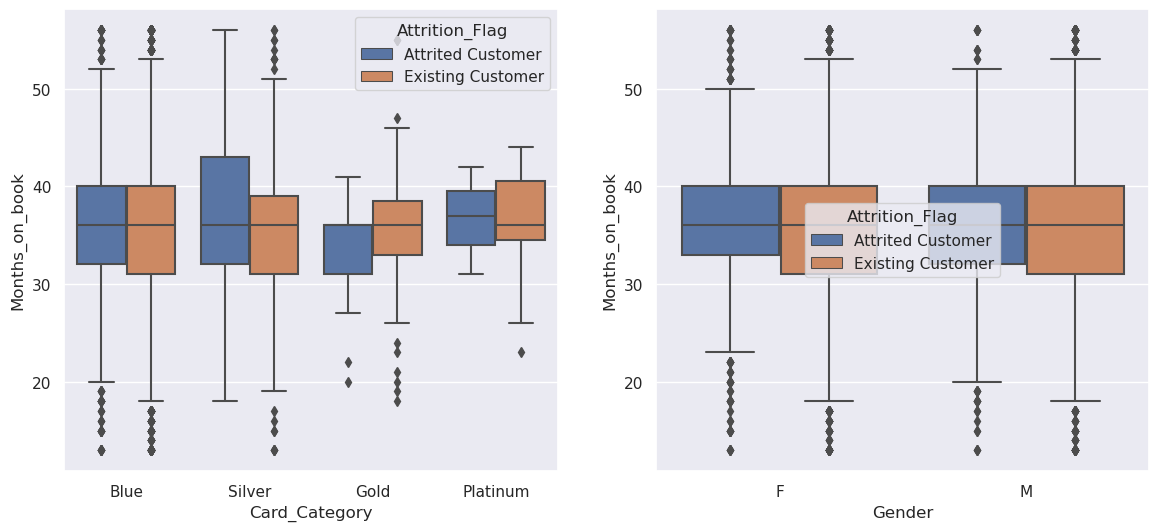

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=train_cp, x="Card_Category", y="Months_on_book", hue="Attrition_Flag", ax=ax[0])
sns.boxplot(data=train_cp, x="Gender", y="Months_on_book", hue="Attrition_Flag", ax=ax[1])

In [73]:
attrs = {
    "categorical": {
        "nominal": ["Gender"],
        "ordinal": ["Income_Category", "Card_Category"],
    },
    "numerical": [attr for attr in train_cp.select_dtypes(include=["float64", "int64"]).columns],
    "target": "Attrition_Flag"
}

attrs

{'categorical': {'nominal': ['Gender'],
  'ordinal': ['Income_Category', 'Card_Category']},
 'numerical': ['Customer_Age',
  'Dependent_count',
  'Months_on_book',
  'Total_Relationship_Count',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Total_Amt_Chng_Q4_Q1',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Total_Ct_Chng_Q4_Q1',
  'Avg_Utilization_Ratio'],
 'target': 'Attrition_Flag'}

Prvo ćemo za detekciju outlier-a probati **LocalOutlierFactor** algoritam.<br>
<font color='green'>Ovaj algoritam računa LOF za svaku tačku podataka, u odnosu na njene susede (broj suseda se definiše hiperparametrom algoritma). Cilj je detektovati tačke koje imaju značajno manju LOF vrednost u odnosu na susede, što znači da se nalaze u oblastima sa manjom gustinom tačaka i samim tim predstavljaju outlier-e.</font>

In [74]:
income_categories = ["Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
card_categories=["Blue", "Silver", "Gold", "Platinum"]

nominal_pipeline = pipeline.make_pipeline(preproc.OneHotEncoder(drop="if_binary"))
ordinal_pipeline = pipeline.make_pipeline(preproc.OrdinalEncoder(categories=[income_categories, card_categories]))

transformer = compose.ColumnTransformer([
    ("nominal_transformer", nominal_pipeline, attrs["categorical"]["nominal"]),
    ("ordinal_transformer", ordinal_pipeline, attrs["categorical"]["ordinal"])
], remainder="passthrough")


transformed_train_cp = transformer.fit_transform(train_cp.drop("Attrition_Flag", axis=1))

In [75]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=35, contamination="auto")
y_pred = lof.fit_predict(transformed_train_cp)

In [76]:
train_cp["is_outlier"] = y_pred

In [77]:
train_cp["is_outlier"].value_counts()

is_outlier
 1    8040
-1      61
Name: count, dtype: int64

In [78]:
outliers_2d = pca.fit_transform(transformed_train_cp)
outliers_df = pd.DataFrame()
outliers_df["x"] = outliers_2d[:, 0]
outliers_df["y"] = outliers_2d[:, 1]
outliers_df["is_outlier"] = y_pred

<Axes: xlabel='x', ylabel='y'>

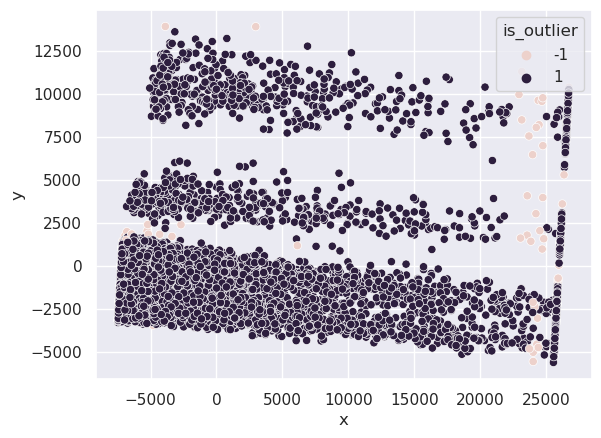

In [79]:
sns.scatterplot(data=outliers_df, x="x", y="y", hue="is_outlier")

In [80]:
train_cp[train_cp["is_outlier"] == -1]["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    39
Attrited Customer    22
Name: count, dtype: int64

In [81]:
outliers = train_cp[train_cp["is_outlier"] == -1]

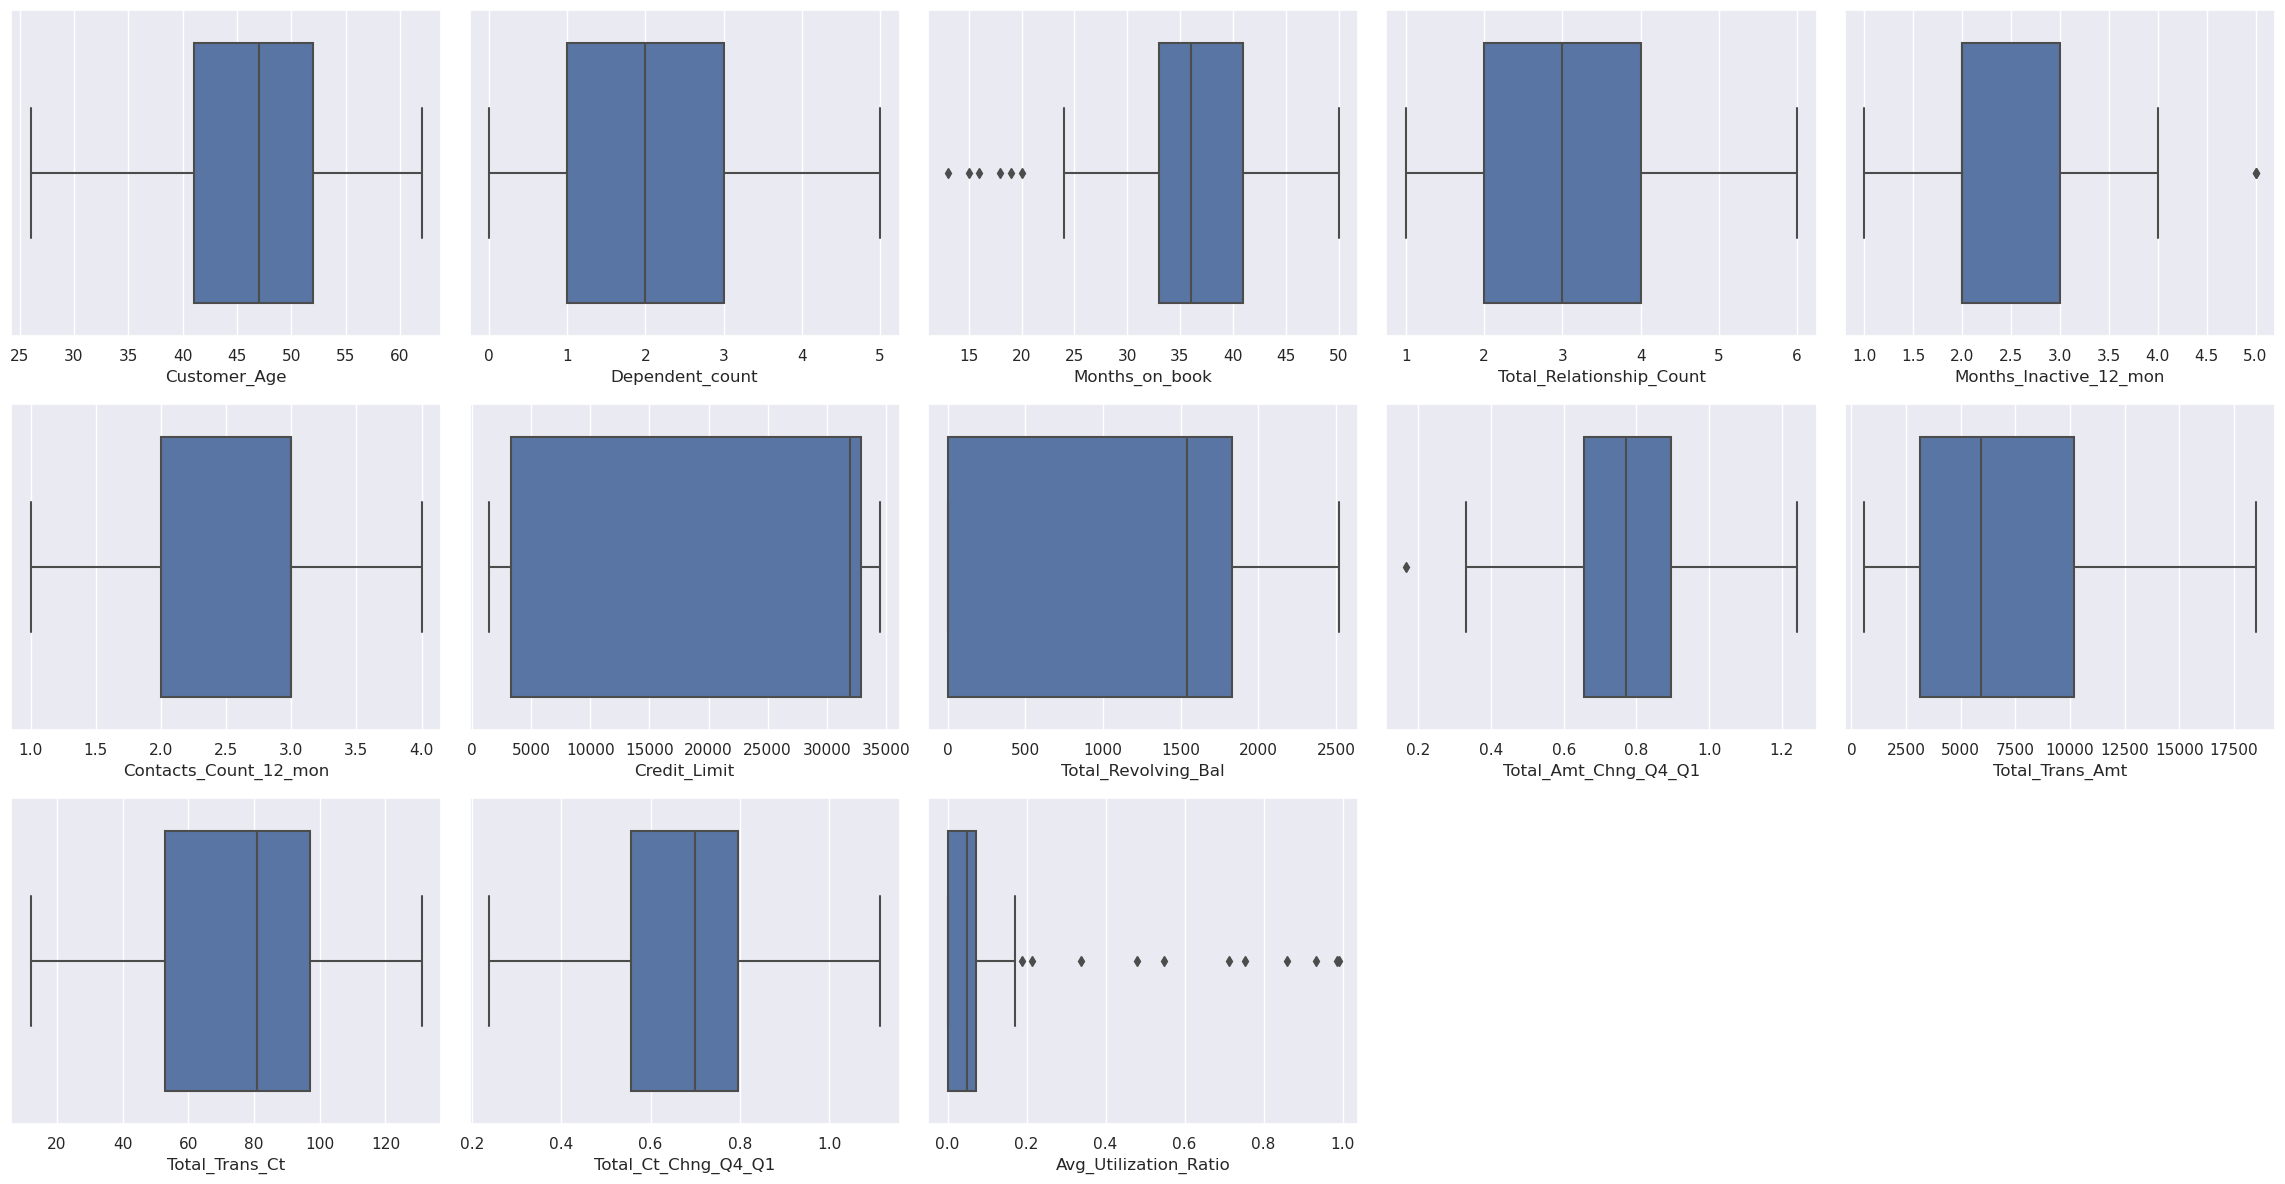

In [82]:
fig, ax = plt.subplots(3, 5, figsize=(23, 12))
ax = ax.flatten()

num_attrs = attrs["numerical"].copy()

for i, col in enumerate(num_attrs):
    sns.boxplot(data=outliers, x=col, ax=ax[i])

fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
fig.tight_layout()

Možemo da primetimo da je smanjen broj outlier-a. Kada budemo trenirali modele kasnije, testiraćemo ih nad celim datasetom, kao i nad datasetom bez outlier-a.

<font color='magenta'>**Rezime:**
- Brišemo kolone *Marital_Status* i *Education_Level*, zbog dosta nedostajućih vrednosti - analizom je utvrđeno da ovi atributi ne utiču značajno na klasfikaciju.
- Brišemo kolonu *Avg_Open_To_Buy* zbog potpune linearne korelacije sa atributom *Credit_Limit*.
- Nedostajuće vrednosti u koloni *Income_Category* popunjavamo korišćenjem IterativeImputer-a, koji popunjava nedostajuće vrednosti na osnovu drugih atributa vrste. IterativeImputer koristi ostale atribute kao predictore dok atribut sa nedostajućim vrednostima tretira kao target, koji popunjava korišćenjem modela klasifikacije.
- Outliere detektujemo korišćenjem **LocalOutlierFactor** algoritma, koji kao outliere detektuje tačke u prostoru sa manjom gustinom tačaka u okolini" u odnosu na gustinu tačaka u okolini njenih najbližih suseda. Zbog prirode problema, tj. zbog velikog disbalansa target klase, modeli koji se testiraju u nastavku će biti trenirani na originalnom datasetu (sa svim vrstama), kao i na datasetu sa izbačenim outlier-ima. Razlog tome je upravo što outlieri mogu biti značajni za detekciju manjinske klase (upravo outlieri mogu biti događaj od interesa, tj. korisnici koji imaju tendenciju da napuste banku).

</font>

### Selekcija atributa

In [83]:
dataset = train_cp.drop(["is_outlier"], axis=1).copy(deep=True)
dataset.shape

(8101, 17)

In [84]:
dataset.replace(to_replace="Unknown", value=np.nan, inplace=True)

In [85]:
dataset.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Income_Category  \
1602  Attrited Customer            54      F                3             NaN   
7791  Existing Customer            51      M                0    $80K - $120K   
7177  Existing Customer            45      F                4     $40K - $60K   
97    Existing Customer            53      M                3     $40K - $60K   
4820  Existing Customer            48      F                2             NaN   

     Card_Category  Months_on_book  Total_Relationship_Count  \
1602          Blue              49                         6   
7791          Blue              45                         3   
7177          Blue              29                         3   
97            Blue              35                         5   
4820          Blue              40                         3   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
1602                       2                      3       13184.0   
7791                       2                      3       10648.0   
7177                       2                      1        4595.0   
97                         3                      2        3789.0   
4820                       2                      4        5104.0   

      Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
1602                    0                 1.166             2047   
7791                 2517                 0.708             4930   
7177                 1781                 0.708             3746   
97                   1706                 1.047             1609   
4820                  736                 0.679             3943   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
1602              33                0.179                  0.000  
7791              89                0.978                  0.236  
7177              68                0.545                  0.388  
97                42                0.680                  0.450  
4820              78                0.696                  0.144

In [86]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

income_categories = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
card_categories=["Blue", "Silver", "Gold", "Platinum"]

nominal_pipeline = pipeline.make_pipeline(preproc.OneHotEncoder(drop="if_binary", sparse_output=False))
ordinal_pipeline = pipeline.make_pipeline(preproc.OrdinalEncoder(categories=[income_categories, card_categories], handle_unknown="use_encoded_value", unknown_value=-1, dtype=np.int64))

transformer = compose.ColumnTransformer([
    ("nominal_transformer", nominal_pipeline, attrs["categorical"]["nominal"]),
    ("ordinal_transformer", ordinal_pipeline, attrs["categorical"]["ordinal"])
], remainder="passthrough").set_output(transform="pandas")

imputer = IterativeImputer(missing_values=-1, random_state=42, initial_strategy="most_frequent", max_iter=50).set_output(transform="pandas")

pipe = pipeline.make_pipeline(transformer, imputer)

In [87]:
transformed_dataset = pipe.fit_transform(dataset.drop(["Attrition_Flag"], axis=1))

In [88]:
transformed_dataset["ordinal_transformer__Income_Category"] = transformed_dataset["ordinal_transformer__Income_Category"].apply(lambda x: np.rint(x))

In [89]:
label_encoder = preproc.LabelEncoder()
target = label_encoder.fit_transform(dataset["Attrition_Flag"])

In [90]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(transformed_dataset, target)

RandomForestClassifier(n_estimators=200, random_state=42)

In [91]:
f_importances_rf = sorted(list(zip(rfc.feature_importances_, rfc.feature_names_in_)), key=lambda x: x[0], reverse=True)

[Text(0, 0, 'remainder__Total_Trans_Amt'),
 Text(1, 0, 'remainder__Total_Trans_Ct'),
 Text(2, 0, 'remainder__Total_Revolving_Bal'),
 Text(3, 0, 'remainder__Total_Ct_Chng_Q4_Q1'),
 Text(4, 0, 'remainder__Total_Relationship_Count'),
 Text(5, 0, 'remainder__Total_Amt_Chng_Q4_Q1'),
 Text(6, 0, 'remainder__Avg_Utilization_Ratio'),
 Text(7, 0, 'remainder__Credit_Limit'),
 Text(8, 0, 'remainder__Customer_Age'),
 Text(9, 0, 'remainder__Months_on_book'),
 Text(10, 0, 'remainder__Contacts_Count_12_mon'),
 Text(11, 0, 'remainder__Months_Inactive_12_mon'),
 Text(12, 0, 'remainder__Dependent_count'),
 Text(13, 0, 'ordinal_transformer__Income_Category'),
 Text(14, 0, 'nominal_transformer__Gender_M'),
 Text(15, 0, 'ordinal_transformer__Card_Category')]

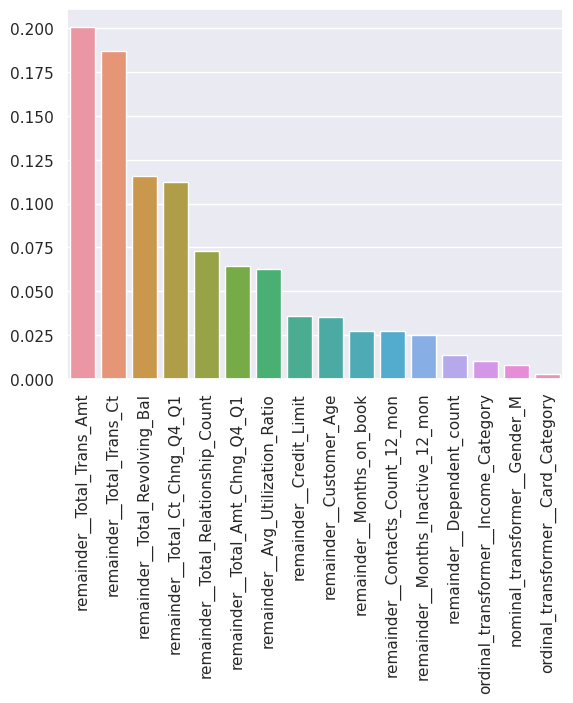

In [92]:
p = sns.barplot(x=list(map(lambda x: x[1], f_importances_rf)), y=list(map(lambda x: x[0], f_importances_rf)))
p.set_xticklabels(labels=p.get_xticklabels(), rotation=90)

Za selekciju atributa koristimo selekciju zasnovanu na stablima. Korišćenjem atributa ***feature_importances*** RandomForest klasifikatora, možemo da vidimo koji su atributi važniji, a koji manje važni za ispravnu klasifikaciju. Najoptimalniji broj atributa biće određen korišćenjem tehnika za nalaženje optimalnih hiperparametara.

## Treniranje modela

In [93]:
train.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
1602  Attrited Customer            54      F                3         College   
7791  Existing Customer            51      M                0     High School   
7177  Existing Customer            45      F                4     High School   
97    Existing Customer            53      M                3       Doctorate   
4820  Existing Customer            48      F                2        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
1602         Single         Unknown          Blue              49   
7791         Single    $80K - $120K          Blue              45   
7177         Single     $40K - $60K          Blue              29   
97          Married     $40K - $60K          Blue              35   
4820        Married         Unknown          Blue              40   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
1602                         6                       2                      3   
7791                         3                       2                      3   
7177                         3                       2                      1   
97                           5                       3                      2   
4820                         3                       2                      4   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
1602       13184.0                    0          13184.0   
7791       10648.0                 2517           8131.0   
7177        4595.0                 1781           2814.0   
97          3789.0                 1706           2083.0   
4820        5104.0                  736           4368.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
1602                 1.166             2047              33   
7791                 0.708             4930              89   
7177                 0.708             3746              68   
97                   1.047             1609              42   
4820                 0.679             3943              78   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
1602                0.179                  0.000  
7791                0.978                  0.236  
7177                0.545                  0.388  
97                  0.680                  0.450  
4820                0.696                  0.144

In [94]:
test.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
9242  Existing Customer            47      M                3        Graduate   
7036  Existing Customer            51      M                1     High School   
914   Existing Customer            55      M                2         College   
9681  Existing Customer            40      F                4      Uneducated   
9026  Attrited Customer            62      M                1     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9242         Single     $60K - $80K        Silver              36   
7036        Married  Less than $40K          Blue              41   
914         Married    $80K - $120K          Blue              45   
9681        Married         Unknown          Blue              29   
9026         Single     $60K - $80K          Blue              46   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9242                         1                       1                      2   
7036                         3                       4                      3   
914                          5                       1                      2   
9681                         2                       3                      3   
9026                         2                       3                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9242       30498.0                 1990          28508.0   
7036        1438.3                    0           1438.3   
914         2929.0                 2431            498.0   
9681        3326.0                 2181           1145.0   
9026        7547.0                 2477           5070.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9242                 0.839            16202             120   
7036                 0.623             4312              81   
914                  1.632             1903              39   
9681                 0.827            13583             110   
9026                 1.021             5294              73   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9242                0.791                  0.065  
7036                0.723                  0.000  
914                 0.625                  0.830  
9681                0.746                  0.656  
9026                0.698                  0.328

In [95]:
numerical = [attr for attr in train.select_dtypes(include=["float64", "int64"]).columns]
numerical.remove("Avg_Open_To_Buy")

attrs = {
    "categorical": {
        "nominal": ["Gender"],
        "ordinal": ["Income_Category", "Card_Category"],
    },
    "numerical": numerical,
    "target": "Attrition_Flag"
}

attrs

{'categorical': {'nominal': ['Gender'],
  'ordinal': ['Income_Category', 'Card_Category']},
 'numerical': ['Customer_Age',
  'Dependent_count',
  'Months_on_book',
  'Total_Relationship_Count',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Total_Amt_Chng_Q4_Q1',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Total_Ct_Chng_Q4_Q1',
  'Avg_Utilization_Ratio'],
 'target': 'Attrition_Flag'}

In [96]:
income_categories = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
card_categories=["Blue", "Silver", "Gold", "Platinum"]

nominal_pipeline = pipeline.make_pipeline(preproc.OneHotEncoder(drop="if_binary", sparse_output=False))
ordinal_pipeline = pipeline.make_pipeline(preproc.OrdinalEncoder(categories=[income_categories, card_categories], handle_unknown="use_encoded_value", unknown_value=-1, dtype=np.int64))
num_scaling_pipeline = pipeline.make_pipeline(preproc.StandardScaler())

selector = compose.ColumnTransformer([
    ("selector", "drop", ["Avg_Open_To_Buy", "Marital_Status", "Education_Level"])
], remainder="passthrough", n_jobs=-1, verbose_feature_names_out=False).set_output(transform="pandas")

transformer = compose.ColumnTransformer([
    ("nominal_transformer", nominal_pipeline, attrs["categorical"]["nominal"]),
    ("ordinal_transformer", ordinal_pipeline, attrs["categorical"]["ordinal"]),
    ("num_scaler", num_scaling_pipeline, ["Credit_Limit", "Total_Revolving_Bal", "Total_Trans_Amt", "Total_Trans_Ct", "Customer_Age", "Months_on_book"])
], remainder="passthrough", n_jobs=-1)

imputer = IterativeImputer(missing_values=-1, random_state=42, initial_strategy="most_frequent", max_iter=50)

pipe = pipeline.make_pipeline(selector, transformer, imputer)
target_enc = preproc.LabelEncoder()

Ovaj pipeline ćemo koristiti u nastavku za transformaciju train i test podataka.

In [97]:
n_splits = 5
kf = model_selection.StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
scoring = {"precision": "precision", "recall": "recall", "acc": "accuracy", "pr": "average_precision", "auc": "roc_auc"}

### Sa outlier-ima

In [98]:
X_train = train.drop(["Attrition_Flag"], axis=1)
y_train = train["Attrition_Flag"]

In [99]:
X_train.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
1602            54      F                3         College         Single   
7791            51      M                0     High School         Single   
7177            45      F                4     High School         Single   
97              53      M                3       Doctorate        Married   
4820            48      F                2        Graduate        Married   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
1602         Unknown          Blue              49                         6   
7791    $80K - $120K          Blue              45                         3   
7177     $40K - $60K          Blue              29                         3   
97       $40K - $60K          Blue              35                         5   
4820         Unknown          Blue              40                         3   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
1602                       2                      3       13184.0   
7791                       2                      3       10648.0   
7177                       2                      1        4595.0   
97                         3                      2        3789.0   
4820                       2                      4        5104.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
1602                    0          13184.0                 1.166   
7791                 2517           8131.0                 0.708   
7177                 1781           2814.0                 0.708   
97                   1706           2083.0                 1.047   
4820                  736           4368.0                 0.679   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
1602             2047              33                0.179   
7791             4930              89                0.978   
7177             3746              68                0.545   
97               1609              42                0.680   
4820             3943              78                0.696   

      Avg_Utilization_Ratio  
1602                  0.000  
7791                  0.236  
7177                  0.388  
97                    0.450  
4820                  0.144

In [100]:
y_train

1602    Attrited Customer
7791    Existing Customer
7177    Existing Customer
97      Existing Customer
4820    Existing Customer
              ...        
6821    Existing Customer
6178    Existing Customer
2544    Existing Customer
4945    Existing Customer
3640    Existing Customer
Name: Attrition_Flag, Length: 8101, dtype: object

In [101]:
y_train_t = target_enc.fit_transform(y_train)

<font color='pink'>
Akcenat u ovom projektu je na **ansambl** modelima, koji nisu zasnovani na stablima odlučivanja.<br>
Kao adekvatni primeri demonstrirani različiti modeli koji su deo **scikit-learn** biblioteke, od kojih svaki od njih rešava različite probleme koji se mogu javiti. To su:

- <font color='cyan'>**VotingClassifier**</font> - Ideja ovog klasifikatora je da iskombinuje predikcije više različitih osnovnih modela na osnovu većinskog glasanja, ili ponderisanog proseka (weighted average) verovatnoća svakog od modela. Ovakav klasifikator može poboljšati rezultate klasifikacije jer se glasanjem mogu "prikriti" određeni nedostaci individualnih modela. (Potrebno je da individualni modeli sami po sebi budu dovoljno dobri kako bi i konačni rezultati imali smisla, naročito u slučaju većinskog glasanja).
- <font color='cyan'>**BaggingClassifier**</font> - Ansambl metoda koja koristi više instanci definisanog osnovnog modela, kako bi se smanjila varijansa modela, tj. sprečio overfitting. Ovaj klasifikator to postiže tako što se svaka instanca osnovnog modela trenira na različitom podskupu početnog dataseta, što dovodi do bolje generalizacije. Podskup početnog dataseta može biti podskup vrsta, podskup atributa, ili podskup i atributa i vrsta. Prilikom izbora vrsta koristi se uzorkovanje sa zamenom.
- <font color='cyan'>**StackingClassifier**</font> - StackingClassifier se, za razliku od BaggingClassifera koristi da rezultate većeg broja prostijih modela poveže tako da smanji bias svakog od njih, tj. da bi se sprečio underfitting. Ideja je da se rezultati klasifikacije (ili verovatnoće) svakog prostijeg modela dovedu kao ulaz finalnog estiamtora, koji zatim vrši klasifikaciju.
- <font color='cyan'>**AdaBoost**</font> - Specifičan primer klasifikatora koji koristi veliki broj *slabih klasifikatora (Weak Learners)* koji se treniraju u više iteracija, nad različitim podskupovima početnog dataseta. U svakoj novoj iteraciji se ažuriraju težine vrsta dataseta, tako da se vrste koje su prethodno pogrešno klasifikovane imaju veću verovatnoću da budu izabrane. Ovakvim pristupom se forsira bolje prilagođavanje klasifikatora primerima koji su teži za klasifikaciju. Inicijalno, svaki individualni slabi klasifikator ima neznatno bolje performase klasifikacije od dummy klasifikatora (neznatno preko 50%).

</font>

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

biased_models = {
    "lreg": LogisticRegression(penalty='l1', C=1e-4, solver="liblinear", max_iter=200, class_weight="balanced", n_jobs=-1),
    "svm": SVC(kernel="linear", class_weight="balanced", C=1e-5),
    "knn": KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
}

In [122]:
# Pomocna funkcija za unakrsnu validaciju modela

def run_cv(model, X, y, pipe, cv, scoring, resampled=False, train_score=False):
    X_c = X.copy(deep=True)
    y_c = y.copy()

    if resampled:
        print("resampling...")
    
    pipe_w_m = pipeline.make_pipeline(pipe, model)
    results = model_selection.cross_validate(pipe_w_m, X_c, y_c, cv=cv, scoring=scoring, return_train_score=train_score)
    return results

In [126]:
# Pomocna funkcija za pregledniji prikaz rezultata

def display_results(results, scoring, with_std=False):
    res_df = pd.DataFrame()

    for model in results:
        model_res = results[model]
        res_dict = dict()
        for metric in scoring.keys():
            metric_train = f'train_{metric}'
            metric_test = f'test_{metric}'
            res_dict[f'{metric_train}_avg'] =  np.mean(model_res[metric_train])
            res_dict[f'{metric_test}_avg'] =  np.mean(model_res[metric_test])
            if with_std:
                res_dict[f'{metric_train}_std'] =  np.std(model_res[metric_train])
                res_dict[f'{metric_test}_std'] =  np.std(model_res[metric_test])   
        res_df[model] = res_dict

    display(res_df.T)

In [124]:
results = dict()

for model in biased_models:
    results[model] = run_cv(biased_models[model], X_train, y_train_t, pipe, kf, scoring=scoring, train_score=True)

In [128]:
display_results(results, scoring, with_std=False)

train_precision_avg  test_precision_avg  train_precision_std  \
lreg             0.000000            0.000000             0.000000   
svm              0.671409            0.671481             0.335704   
knn              0.937590            0.925906             0.000750   

      test_precision_std  train_recall_avg  test_recall_avg  train_recall_std  \
lreg            0.000000          0.000000         0.000000          0.000000   
svm             0.335741          0.800000         0.800000          0.400000   
knn             0.004308          0.977202         0.973671          0.001193   

      test_recall_std  train_acc_avg  test_acc_avg  train_acc_std  \
lreg         0.000000       0.160721      0.160721       0.000070   
svm          0.400000       0.703538      0.703684       0.271445   
knn          0.007397       0.926275      0.912480       0.001491   

      test_acc_std  train_pr_avg  test_pr_avg  train_pr_std  test_pr_std  \
lreg      0.000280      0.839279     0.839279      0.000070     0.000280   
svm       0.271336      0.965943     0.965646      0.000259     0.002510   
knn       0.005613      0.990725     0.974362      0.000271     0.002601   

      train_auc_avg  test_auc_avg  train_auc_std  test_auc_std  
lreg       0.500000      0.500000       0.000000      0.000000  
svm        0.870671      0.869181       0.001509      0.010921  
knn        0.964091      0.919215       0.000913      0.006896